In [1]:
# IMPORTS
import pandas as pd
from math import sqrt
import numpy as np
from random import seed
from random import randrange
import sys

seed(2)

In [2]:
# DATA
data = pd.read_csv("./data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Cleaning Data
data.drop(['id'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


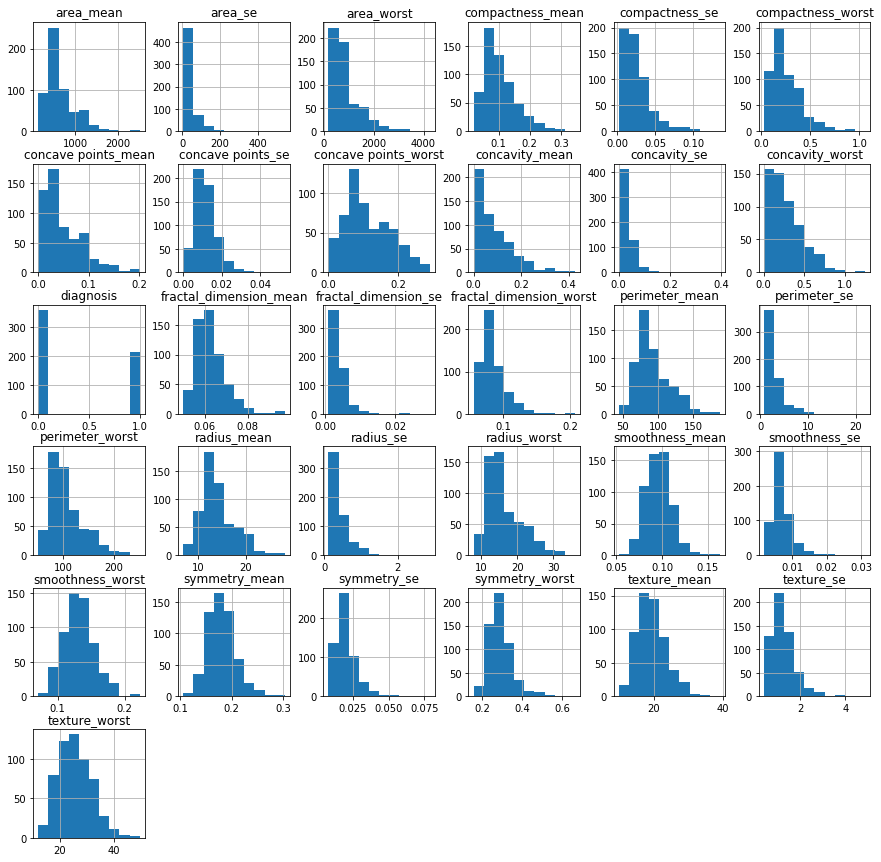

In [4]:
 pd.DataFrame.hist(data, figsize = [15,15]);

In [5]:
# split data in particular ratio for train and test
def split_data(data,ratio):
    shuffle_df = data.sample(frac=1)
    train_size = int(ratio * len(data))
    train_set = shuffle_df[:train_size]
    test_set = shuffle_df[train_size:]
    return train_set, test_set

train, test = split_data(data,0.7)
print("data shape:", data.shape)
print("train count:", train.shape)
print("test count:", test.shape)

data shape: (569, 31)
train count: (398, 31)
test count: (171, 31)


In [6]:
# split data in folds for multiple decision trees
n_folds = 5
def cross_validation_split(dataframe, n_folds):
    dataframe_split = list()
    dataframe_copy = dataframe
    for i in range(n_folds):
        left_fold = n_folds - i
        fold_fraction = float(1/left_fold)
        fold = dataframe_copy.sample(frac=fold_fraction)
        dataframe_split.append(fold)
        dataframe_copy = dataframe_copy.drop(fold.index)
    return dataframe_split
dataframe_split = cross_validation_split(data, n_folds)
print("split data in ",len(dataframe_split), "folds")

split data in  5 folds


In [7]:
n_features = int(sqrt(data.shape[1]-1))
print("n_fratures: ",n_features)


n_fratures:  5


In [8]:
def evaluate_algorithum(dataframe,n_folds):
    folds = cross_validation_split(dataframe, n_folds)
    for i in range(len(folds)):
        l_without_i = folds[:i] + folds[(i + 1):]
        train = pd.concat(l_without_i)
        test = folds[i]
        #execute decision tree algo for every iteration and calculate accuracy
        print("train:", train.shape[0], "test:", test.shape[0])
# evaluate_algorithum(data,n_folds)

In [9]:
## Decision Tree
def build_tree(dataset, min_sample_size, max_depth, feature_count):
    root = split_nodes(dataset, feature_count)
    build_children(root, max_depth, min_sample_size, feature_count, 1)
    return root

def split_nodes(dataset, feature_count):
    class_labels = list(set([row[0] for row in dataset]))
    feature_list = []
    
    while len(feature_list) < feature_count:
        index = np.random.randint(low = 0, high=29)
        if index not in feature_list:
            feature_list.append(index)
    
    node_index, node_value, best_GI_score, node_groups = -1, -1, -1, None
    for feature_index in feature_list:
        for row in dataset:
            groups = split_groups(feature_index, row[feature_index], dataset)
            GI_score = gini_index(groups, class_labels)
#             GI_score = calc_GI(dataset, class_labels)
#             print("class GI score: ", GI_score)
#             for group in groups:
#                 group_GI_score = calc_GI(group, class_labels)
# #                 print("group ", len(group), ", GI score: ", group_GI_score)
#                 GI_score -=  group_GI_score * (len(group) / len(dataset))
            print("GI gained ", GI_score)
            if GI_score > best_GI_score:
                node_index, node_value, best_GI_score, node_groups = feature_index, row[feature_index], GI_score, groups
    print("Final gained: ", best_GI_score)            
    return {'index': node_index, 'value': node_value, 'groups': node_groups}    
    
def split_groups(index, value, dataset):
    left = []
    right = []
    for row in dataset:
        if row[index] < value: 
            left.append(row)
        else: 
            right.append(row)
    return [left, right]

# Gini impurity = (1 - sum(p^2)) * sample size / total size
def calc_GI(group, class_labels): 
    group_size = len(group)
    if group_size == 0: 
        return 0
    groups_score = 0
    for label in class_labels:
        p = [row[0] for row in group].count(label) / group_size
        groups_score += p * p;
    return 1 - groups_score

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = calc_GI([row for group in groups for row in group], classes)
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[0] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini -= (1.0 - score) * (size / n_instances)
    return gini


def build_children(node, max_depth, min_size, feature_count, depth): 
    left, right = node['groups']
    del node['groups']
    if not left or not right: 
        node['left'] = node['right'] = build_terminal_node(left + right)
        return 
    # if max depth is reached
    if depth >= max_depth:
        node['left'] = build_terminal_node(left)
        node['right'] = build_terminal_node(right)
        return 
    if (len(left) <= min_size):
        node['left'] = build_terminal_node(left)
    else:
        node['left'] = split_nodes(left, feature_count)
        build_children(node['left'], max_depth, min_size, feature_count, depth + 1)
    if (len(right) <= min_size):
        node['right'] = build_terminal_node(right)
    else:
        node['right'] = split_nodes(left, feature_count)
        build_children(node['right'], max_depth, min_size, feature_count, depth + 1)

def build_terminal_node(group):
    labels = [row[0] for row in group]
    return max(set(labels), key=labels.count)

def predict_from_tree(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict): # check if it's terminal
            return predict_from_tree(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict): # check if it's terminal
            return predict_from_tree(node['right'], row)
        else:
            return node['right']

In [10]:
## Forest
def build_forest(train, n_trees, feature_count, max_depth=5, min_size=1, sample_ratio=1):
    trees = []
    for i in range(n_trees):
        sample = []
        n_sample = len(train) * sample_ratio
        while len(sample) < n_sample:
            index = np.random.randint(low=0, high=len(train))
            sample.append(train[index])
        tree = build_tree(sample, min_size, max_depth, feature_count)
        trees.append(tree)
    return trees

def random_forest_algorithm(train, test, n_trees, feature_count, max_depth=5, min_size=1, sample_ratio=1):
    trees = build_forest(train, n_trees, feature_count, max_depth=5, min_size=1, sample_ratio=1)
    predictions = []
    for row in test:
        row_prediction = [predict_from_tree(tree, row) for tree in trees]
        predictions.append(max(set(row_prediction), key=row_prediction.count))
    return predictions

def score_accuracy(actual, predictions):
    print(actual)
    print("\n", predictions)
    correct = 0; 
    for i in range(len(actual)):
        if actual[i] == predictions[i]:
            correct += 1
    return correct / (len(actual) * 100.0)

In [11]:
train_list = train.values.tolist()
test_list = test.values.tolist()
data_list = data.values.tolist()

predictions = random_forest_algorithm(train_list, test_list, 5, int(sqrt(len(data_list[0]))))
score_accuracy([row[0] for row in test_list], predictions)

GI gained  0.033052208872508426
GI gained  0.018257309463959537
GI gained  0.011583609330294786
GI gained  0.13971313905419147
GI gained  0.0006966213419666301
GI gained  0.04156373116636125
GI gained  0.2554771377323719
GI gained  0.2560208917283233
GI gained  0.11691708091851283
GI gained  0.020338182650287195
GI gained  0.2824817763613405
GI gained  0.08187026190734065
GI gained  0.10312383066543307
GI gained  0.2694463317869291
GI gained  0.05800166693159392
GI gained  0.023360541840829474
GI gained  0.256596764024938
GI gained  0.12270157572721596
GI gained  0.2648810664209496
GI gained  0.2744345697508822
GI gained  0.03737943884989614
GI gained  0.037032072990760834
GI gained  0.1810855897160195
GI gained  0.28737400432326143
GI gained  0.09922424487491194
GI gained  0.239698101106527
GI gained  0.22075102686273051
GI gained  0.08187026190734065
GI gained  0.2666616119795963
GI gained  0.18929082394391838
GI gained  0.2530205125168173
GI gained  0.09034174080678403
GI gained  0.

GI gained  0.0557215201500741
GI gained  0.04528446103685424
GI gained  0.09781344941106623
GI gained  0.012339888285914313
GI gained  0.07203048596879391
GI gained  0.022545543975064253
GI gained  0.016246910113367402
GI gained  0.054808475470330284
GI gained  0.07855468208662464
GI gained  0.0
GI gained  0.0
GI gained  0.0003334018253396626
GI gained  0.04472600660295323
GI gained  0.05393601824935061
GI gained  0.05698784772040494
GI gained  0.10804093338316226
GI gained  0.02919230434697212
GI gained  0.047177655941546215
GI gained  0.07426782105411445
GI gained  0.048330642816908354
GI gained  0.07709058841824701
GI gained  0.06284306348454027
GI gained  0.048845164846925276
GI gained  0.10906051186371246
GI gained  0.11565064407164338
GI gained  0.026665436767569106
GI gained  0.09046525992786444
GI gained  0.006763227673196107
GI gained  0.10533681868244127
GI gained  0.09806704381380249
GI gained  0.06497564979538822
GI gained  0.07069206644974929
GI gained  0.05080249517869717

GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.4671599202040352
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.4671599202040352
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.4671599202040352
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.06952577633030399
GI gained  0.07127874878207735
GI gained  0.05634890029510642
GI gained  0.04866325709749205
GI gained  0.012339888285914313
GI gained  0.02397521894272414
GI gained  0.06104347941422765
GI gained  0.08583342868172156
GI gained  0.048330642816908354
GI gained  0.06934567254873159
GI gained  0.08269312083788025
GI gained  0.019099863921046067
GI gained  0.010039713572915221
GI gained  0.06061990269677736
GI gained  0.009338344794520115
GI gained  0.05709492202505667
GI gained  0.0712426350745482
GI gained  0.0705286011970283
GI gained  0.0909695889943399
GI gained  0.08583342868172156
GI gained  0.023360541840829474
GI gained  0.07218377265407
GI gained  0.009338344794520115
GI gained  0.06595112766946062
GI gained  0.030426683614129924
GI gained  0.0717781022978306
GI gained  0.03667666560770022
GI gained  0.020194799695325366
GI gained  0.047347790442880816
GI gained  0.07893524766120089
GI gained  0.06653154680793344
GI gained  0.03759421224636744
GI ga

GI gained  0.15251691463059297
GI gained  0.14251559885303472
GI gained  0.14251559885303472
GI gained  0.12486967255224679
GI gained  0.11945049931317309
GI gained  0.06073707370609921
GI gained  0.0039854620547026265
GI gained  0.04839945119230993
GI gained  0.02272523200507104
GI gained  0.09062739764727373
GI gained  0.1459644835613623
GI gained  0.15223089894224975
GI gained  0.08421043515870502
GI gained  0.11182915348174088
GI gained  0.05256958886821167
GI gained  0.0065813577489023944
GI gained  0.15251691463059297
GI gained  0.12276892514434859
GI gained  0.04011560773258693
GI gained  0.14676854893326696
GI gained  0.11020498710619242
GI gained  0.12064033013726716
GI gained  0.14038179882792381
GI gained  0.01948337274846601
GI gained  0.12570496915052562
GI gained  0.035210145081704336
GI gained  0.04574311198137798
GI gained  0.07608037280718705
GI gained  0.15223089894224975
GI gained  0.13170263021309359
GI gained  0.13507350717667238
GI gained  0.11759102174992977
GI g

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  2.6878603032964854e-05
GI gained  0.0013504954839504701
GI gained  0.0015414180234578911
GI gained  0.006165821862369048
GI gained  0.0018312860386804353
GI gained  7.646498542124291e-06
GI gained  0.0016308877580910597
GI gained  0.0004517164715245048
GI gained  3.497305167426967e-05
GI gained  0.0012104375544699786
GI gained  3.5069904474875624e-05
GI gained  7.933401982282429e-05
GI gained  0.00021917000160276423
GI gained  8.215823810248102e-05
GI gained  9.979468347587339e-05
GI gained  0.005112472742579252
GI gained  0.0032977746758920193
GI gained  1.178306351359848e-05
GI gained  7.563235143026592e-05
GI gained  0.0
GI gained  1.9736290531785494e-05
GI gained  0.00317647919439705
GI gained  0.00018104997603628215
GI gained  0.0024815700363109983
GI gained  0.00045176032840479885
GI gained  0.001230905358735379
GI gained  0.0019617382966779784
GI gained  0.0003881695224994819
GI gained  4.58886367564193e-05
GI gained  4.3356101531055735e-05
GI gained  0.00012310370618

GI gained  0.023323055802119297
GI gained  0.032050554483401106
GI gained  0.03384311473985979
GI gained  0.021899335030248768
GI gained  0.030624144118453156
GI gained  0.04091815478151717
GI gained  0.032835777996891746
GI gained  0.0013340982265001924
GI gained  0.027095330683736596
GI gained  0.024679039646676254
GI gained  0.03860733544377898
GI gained  0.021751209169976055
GI gained  0.031147435942131846
GI gained  0.03289639786609763
GI gained  0.0337508166953871
GI gained  0.04579446490501665
GI gained  0.027149430858469048
GI gained  0.025626180489912206
GI gained  0.04909223254739814
GI gained  0.032835777996891746
GI gained  0.04203234685479784
GI gained  0.027422080769896467
GI gained  0.031477813058089554
GI gained  0.03224290564595708
GI gained  0.034811612019485016
GI gained  0.034811612019485016
GI gained  0.0015896580082226074
GI gained  0.03068034781201756
GI gained  0.03213819846447585
GI gained  0.04457237338367534
GI gained  0.0337508166953871
GI gained  0.02332305

GI gained  0.04580803894119784
GI gained  0.003460289707423077
GI gained  0.0704171955276176
GI gained  0.012406072472650909
GI gained  0.03682315229024907
GI gained  0.018693392263504166
GI gained  0.07874509662257739
GI gained  0.006605339124822085
GI gained  0.031191876170660437
GI gained  0.010365172702418601
GI gained  0.030449509587784807
GI gained  0.04861548232323898
GI gained  0.01904196518237533
GI gained  0.0751146529612639
GI gained  0.03602543812233028
GI gained  0.06900997508433293
GI gained  0.07096533395066484
GI gained  0.03288173986893711
GI gained  0.07920186250165723
GI gained  0.013938740083781598
GI gained  0.0006233463432498976
GI gained  0.06997802364316566
GI gained  0.018693392263504166
GI gained  0.0010487478241719703
GI gained  0.07099302229554616
GI gained  0.0704171955276176
GI gained  0.06543378104948672
GI gained  0.0704171955276176
GI gained  0.035364561861070454
GI gained  0.010290637979867137
GI gained  2.110865904666505e-05
GI gained  0.0242085778943

GI gained  0.03154697570017295
GI gained  0.1331546899100779
GI gained  0.03233963329667977
GI gained  0.24002176997237587
GI gained  0.05042476833544807
GI gained  0.0751429492127424
GI gained  0.014479539792408014
GI gained  0.04830466182452253
GI gained  0.010365172702418601
GI gained  0.01723965789519688
GI gained  0.1550799582983114
GI gained  0.03749964955549723
GI gained  0.17774850357606833
GI gained  0.1777701974258387
GI gained  0.2383211933400285
GI gained  0.07838863976894356
GI gained  0.22880426338750534
GI gained  0.23326015993114213
GI gained  0.11538570733595083
GI gained  0.06884226771560586
GI gained  0.08853072581117855
GI gained  0.030640798212166365
GI gained  0.012863775342717099
GI gained  0.0031484541764661977
GI gained  0.15212591295502015
GI gained  0.1987808793635822
GI gained  0.24015833503183293
GI gained  0.1777701974258387
GI gained  0.11253665570475752
GI gained  0.1998221510043141
GI gained  0.12511074598066158
GI gained  0.22896478086694183
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.019294032524561078
GI gained  0.07384700095823771
GI gained  0.0671508809933225
GI gained  0.2135106866253828
GI gained  0.02269463238267483
GI gained  0.13014796329411477
GI gained  0.13939608444675539
GI gained  0.2171389466974902
GI gained  0.13491642686215177
GI gained  0.06919041477196586
GI gained  0.009151639163152536
GI gained  0.047206067086350556
GI gained  0.0182680390534396
GI gained  0.28632742075393014
GI gained  0.043687218053177934
GI gained  0.013982345246620231
GI gained  0.22805915276603617
GI gained  0.2010586894534444
GI gained  0.2908174409140618
GI gained  0.12703515958785677
GI gained  0.15349049558588757
GI gained  0.0
GI gained  0.03689289859431416
GI gained  0.08040656652032419
GI gained  0.2542805882116738
GI gained  0.21836900000582743
GI gained  0.024962955759948613
GI gained  0.048997192945578194
GI gained  0.2581628710917674
GI gained  0.07947974855376194
GI gained  0.24019370731133682
GI gained  0.2767413746998102
GI gained  0.1718403193062

GI gained  0.04880175206464188
GI gained  0.009421272199098663
GI gained  0.0009895069726089112
GI gained  0.0019064535833547835
GI gained  0.02918617512688404
GI gained  0.007052516400853082
GI gained  0.041192211987543303
GI gained  0.012736358201798886
GI gained  0.012057043199463074
GI gained  0.015019719821926514
GI gained  0.005149054122564833
GI gained  0.022238776237412716
GI gained  0.04000919398270486
GI gained  0.0007770442229168874
GI gained  0.010225990192702324
GI gained  0.024607764033536206
GI gained  0.01884683070548826
GI gained  0.012057043199463074
GI gained  0.01961656878021517
GI gained  0.018145137697461095
GI gained  0.007803618294560943
GI gained  0.0393085553673545
GI gained  0.04687243411043823
GI gained  0.010083750288484239
GI gained  0.015287705836180138
GI gained  0.06055041545200418
GI gained  0.05424775595822323
GI gained  0.03802784258123304
GI gained  0.0019064535833547835
GI gained  0.015287705836180138
GI gained  0.044069514719738134
GI gained  0.00

GI gained  0.002076367415287439
GI gained  0.004884856207537647
GI gained  0.009297457055892772
GI gained  0.004095845042649482
GI gained  0.0032021591068776903
GI gained  0.004211772532017044
GI gained  0.0036817671826063214
GI gained  0.005036017223207456
GI gained  0.006066664448079906
GI gained  0.004792401682551614
GI gained  0.004614402012237923
GI gained  0.0016941752129667753
GI gained  0.001258799166339447
GI gained  0.004808954455832126
GI gained  0.0006008933363171251
GI gained  0.00539596223620617
GI gained  6.693367669878547e-05
GI gained  0.0035073000585874037
GI gained  0.0013099130564729333
GI gained  0.0009606813444563156
GI gained  0.002377193624893692
GI gained  0.004619489439488783
GI gained  0.0068446587065841835
GI gained  0.00630435468902682
GI gained  0.006773380285280739
GI gained  0.004111296535268594
GI gained  0.0013599382089969914
GI gained  0.0038187795964762516
GI gained  0.007014438093611269
GI gained  0.004522123837420192
GI gained  0.000715594813117170

GI gained  0.04431649489705097
GI gained  0.1382441233175809
GI gained  0.07539649787451752
GI gained  0.054995438893572834
GI gained  0.04205744301471165
GI gained  0.0433918945508292
GI gained  0.06883818171013212
GI gained  0.036053491717714214
GI gained  0.07230275353128951
GI gained  0.1310361181777425
GI gained  0.021951731303309907
GI gained  0.0993681251863861
GI gained  0.054995438893572834
GI gained  0.0820527956840778
GI gained  0.028900984953368347
GI gained  0.1203811672549298
GI gained  0.0674261429169159
GI gained  0.04593049247883402
GI gained  0.008466304176034223
GI gained  0.021951731303309907
GI gained  0.021493066013901108
GI gained  0.0932998355019897
GI gained  0.06016891419795173
GI gained  0.14219118768775496
GI gained  0.0621445071865962
GI gained  0.023446585736679626
GI gained  0.08040656652032419
GI gained  0.04223779280132778
GI gained  0.11415616418372587
GI gained  0.02698239279562009
GI gained  0.11087488607955276
GI gained  0.023703464017397924
GI gain

GI gained  0.102416406972177
GI gained  0.002188322471750881
GI gained  0.006841684960924466
GI gained  0.0947463176731522
GI gained  0.047564967942669636
GI gained  0.09601975040752767
GI gained  0.062215371347090154
GI gained  0.09233090810653699
GI gained  0.08328819811556837
GI gained  0.09097366890419967
GI gained  0.05568600702999388
GI gained  0.08513922376485777
GI gained  0.08920330749355121
GI gained  0.028810256011640833
GI gained  0.0016906515406376887
GI gained  0.12314582041889366
GI gained  0.08855170515768218
GI gained  0.0830069274578252
GI gained  0.028810256011640833
GI gained  0.10597963891606788
GI gained  0.09039277135357288
GI gained  0.012764249408255601
GI gained  0.13072374438189516
GI gained  0.09754866440598678
GI gained  0.09692045910050931
GI gained  0.13559035783988135
GI gained  0.07205244405972838
GI gained  0.10233450309325598
GI gained  0.05670403180819583
GI gained  0.08742512692982374
GI gained  0.09652594919757651
GI gained  0.0
GI gained  0.009421

GI gained  0.038896846176326424
GI gained  0.04113197333688015
GI gained  0.008389769653374651
GI gained  0.0052294491761185335
GI gained  0.001234588322482244
GI gained  0.03341977516268406
GI gained  0.016461502123790578
GI gained  0.0413683827875419
GI gained  0.020738399826293913
GI gained  0.012793717284308004
GI gained  0.005652600899011595
GI gained  0.0027354303545766845
GI gained  0.007829499801139034
GI gained  0.004422655564284617
GI gained  0.0002745498914741573
GI gained  0.003789192822887144
GI gained  0.014947671177840821
GI gained  0.022045269998876238
GI gained  0.005377098248970091
GI gained  0.001892892332607643
GI gained  0.007164267571647814
GI gained  0.038913213390840445
GI gained  0.005377098248970091
GI gained  0.006238124109178372
GI gained  0.005652600899011595
GI gained  0.0059623080780780435
GI gained  0.039220849271378096
GI gained  0.005369006567303852
GI gained  0.04724464886769239
GI gained  0.04160926587758501
GI gained  0.007164267571647814
GI gained 

GI gained  0.004293178071977377
GI gained  0.03280300340508932
GI gained  0.024104075055017715
GI gained  0.005942265035414979
GI gained  0.00866972448512257
GI gained  0.03509044909152059
GI gained  0.04269081493161413
GI gained  0.000273537838940463
GI gained  0.008495137858928609
GI gained  0.0065403129744515676
GI gained  0.0016011157847003465
GI gained  0.0010618275545659361
GI gained  0.003913114333188278
GI gained  0.021287126326577324
GI gained  0.0581122874128991
GI gained  0.000665283881865375
GI gained  0.005942265035414979
GI gained  0.03345875379202931
GI gained  0.026459892054792683
GI gained  0.009387474011700148
GI gained  0.04418548059906066
GI gained  0.0005231277079076613
GI gained  0.06600345149395485
GI gained  0.039866883928336684
GI gained  0.003307206849614497
GI gained  0.0036666450884312307
GI gained  0.0017320698583837002
GI gained  0.00994695867237086
GI gained  0.006388418513039146
GI gained  0.011534576820519171
GI gained  0.0010618275545659361
GI gained  

GI gained  0.0032469757483578887
GI gained  0.00252251209749485
GI gained  0.00036599682777538334
GI gained  0.002270648473512854
GI gained  0.0012362301511137652
GI gained  0.0021941837341605125
GI gained  0.003225987158171767
GI gained  0.006405340339894969
GI gained  0.0024102205055690634
GI gained  0.004555249650757723
GI gained  0.003610991335184416
GI gained  0.0017949817455576167
GI gained  0.006011351456590569
GI gained  0.005579944603051647
GI gained  0.003713824045888353
GI gained  0.002290678342519198
GI gained  0.001634591130988794
GI gained  0.0010318345819026742
GI gained  0.002577570311658145
GI gained  0.0031627560892823273
GI gained  0.003833652329240239
GI gained  0.0034404555898195216
GI gained  0.0032244230316057776
GI gained  0.002643402429629141
GI gained  0.001766667975347344
GI gained  0.0010389359735244394
GI gained  0.0028905975778846793
GI gained  0.004371850073573241
GI gained  0.002707477973627026
GI gained  0.0030205336655211024
GI gained  0.00463576538455

GI gained  0.006832473531615535
GI gained  0.0
GI gained  0.01044581395800101
GI gained  0.004007669845295964
GI gained  0.007920678396859504
GI gained  0.0035095450949245155
GI gained  0.009172434586402281
GI gained  0.00794375975552053
GI gained  0.006447238822330059
GI gained  0.010908729068528994
GI gained  0.005881809464624799
GI gained  0.008198342400578568
GI gained  0.0042671916327575166
GI gained  0.004136551514483333
GI gained  0.007691306855016927
GI gained  0.010575956142643034
GI gained  0.009303966122725923
GI gained  0.007116138390770063
GI gained  0.004305113627280699
GI gained  0.00786112014573756
GI gained  0.0043996009763231925
GI gained  0.008321935991298018
GI gained  0.010720942468473688
GI gained  0.009088903218523375
GI gained  0.0018330919033840432
GI gained  0.008802557448400194
GI gained  0.007269328587066054
GI gained  0.006372900496684097
GI gained  0.006267499325424641
GI gained  0.009777361485442615
GI gained  0.0052319275437311685
GI gained  0.0019388307

GI gained  9.56004201190094e-05
GI gained  0.0006437359676694822
GI gained  0.0009293250141802455
GI gained  0.00021880341880339826
GI gained  0.0009996557659208184
GI gained  0.0009147323609463315
GI gained  0.0011999999999999546
GI gained  0.00021314415213326797
GI gained  0.0010134100404081917
GI gained  0.0008674141456879031
GI gained  0.00013333333333348518
GI gained  0.0012801441333233493
GI gained  0.0031999999999998627
GI gained  0.0007698666113760931
GI gained  0.0024321839080459345
GI gained  0.0030902749039314614
GI gained  0.000532787788181539
GI gained  2.5806451613055725e-05
GI gained  0.00021314415213326797
GI gained  0.0024321839080459345
GI gained  0.001345155993431926
GI gained  0.0010740998838558932
GI gained  0.0004960525262230585
GI gained  0.002217387404702436
GI gained  0.00018983050847450056
GI gained  7.621825252165926e-05
GI gained  0.0003000000000001335
GI gained  0.0014222222222222553
GI gained  0.001776887519260268
GI gained  0.00014728033472800883
GI gaine

GI gained  0.00028306332842412824
GI gained  0.00017552742616025463
GI gained  0.0003242290748898258
GI gained  0.00047808661926307915
GI gained  0.0006917807338858648
GI gained  6.030255607725882e-05
GI gained  0.0002782608695652833
GI gained  0.0006907395069952454
GI gained  0.00013333333333348518
GI gained  0.0004224768139661564
GI gained  0.0003438596491226499
GI gained  0.0006294010889291851
GI gained  0.00010578512396701434
GI gained  4.0650722665111494e-05
GI gained  0.0006700059630292445
GI gained  0.0003398230088495491
GI gained  3.8866396761025324e-05
GI gained  0.0005756147540983345
GI gained  0.00021880341880339826
GI gained  0.0011447905477979942
GI gained  0.0004580086580085775
GI gained  0.0002632034632034236
GI gained  0.0002782608695652833
GI gained  0.001214570129953317
GI gained  0.0008035231003282323
GI gained  2.300115360723276e-05
GI gained  0.001214570129953317
GI gained  0.0025677490368739633
GI gained  0.0026888888888888934
GI gained  0.0001613445378152445
GI g

GI gained  0.009107692307692289
GI gained  0.0006095238095237682
GI gained  0.002098013245033045
GI gained  0.0020059768188800016
GI gained  0.002815037593984951
GI gained  0.007000019706374913
GI gained  8.304597701137145e-05
GI gained  0.0010389525368249015
GI gained  0.0012858331682187828
GI gained  8.304597701137145e-05
GI gained  0.00021314415213326797
GI gained  0.0007766250631267083
GI gained  0.0001745874587457414
GI gained  0.001437454355764119
GI gained  0.00029344978165946056
GI gained  0.0005142857142856651
GI gained  0.0012858331682187828
GI gained  0.00023347639484976035
GI gained  0.00013333333333348518
GI gained  0.0020655416757980744
GI gained  0.00011648129423665575
GI gained  0.0005037037037037423
GI gained  0.0014062348866087319
GI gained  0.0010623814541622471
GI gained  0.0015605224963715428
GI gained  0.00011934731934723497
GI gained  0.0003922247686952863
GI gained  6.71300893742531e-05
GI gained  0.00035555555555552565
GI gained  0.0006294010889291816
GI gained

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
Final gained:  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gai

GI gained  0.0009025641025640907
GI gained  0.005788764044943745
GI gained  0.0031443725415555707
GI gained  0.0018980392156861293
GI gained  0.002975213675213622
GI gained  0.0012245142002990476
GI gained  0.0006834951456311522
GI gained  0.001940361821584479
GI gained  7.868852459014253e-05
GI gained  0.002121100917431295
GI gained  0.0008201005025125913
GI gained  0.00610232558139534
GI gained  0.002682352941176497
GI gained  0.007911111111111147
GI gained  0.004963265306122441
GI gained  0.009914754098360637
GI gained  0.004492307692307643
GI gained  0.006444746787603886
GI gained  0.005794252873563187
GI gained  0.0007408866995072261
GI gained  0.00610232558139534
GI gained  0.0006095238095237682
GI gained  0.00822857142857139
GI gained  0.0016484848484848436
GI gained  0.0035582014463892905
GI gained  0.001371428571428579
GI gained  0.002815037593984951
GI gained  0.001269273743016705
GI gained  0.004963265306122441
GI gained  0.006926582278480961
GI gained  0.000702439024390239


GI gained  0.0011071491615180194
GI gained  8.592910848148616e-07
GI gained  7.855973813444134e-06
GI gained  8.479067301961352e-07
GI gained  0.0001058608058608912
GI gained  1.024769622891275e-05
GI gained  0.0008924092409239651
GI gained  0.00041990950226250545
GI gained  4.045407636736609e-05
GI gained  1.9021200712426856e-06
GI gained  0.0001644133644133905
GI gained  0.0004221701795471544
GI gained  0.00022857142857135582
GI gained  0.00010578512396701434
GI gained  2.5806451613055725e-05
GI gained  1.791416131036866e-05
GI gained  1.024769622891275e-05
GI gained  0.00010633284241527707
GI gained  0.0008797778338803502
GI gained  4.637681159411905e-05
GI gained  3.813553346019086e-05
GI gained  9.41176470587897e-05
GI gained  0.004231693989071033
GI gained  2.2222222222301885e-05
GI gained  0.0007882697947214981
GI gained  1.2669683257873765e-05
GI gained  0.00017552742616025463
GI gained  0.0003988200589969716
GI gained  0.00014728033472800883
GI gained  0.00022857142857135582
G

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.06243496357960443
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.06243496357960443
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.06243496357960443
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.06243496357960443
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gai

GI gained  0.001185473992017648
GI gained  0.00042431528646314637
GI gained  0.0003856277162267302
GI gained  0.00214940038552721
GI gained  0.0022928093969909816
GI gained  8.425771063316767e-06
GI gained  0.0032397524056769003
GI gained  0.0009548876782760896
GI gained  0.0006210807895351972
GI gained  0.004675202783790612
GI gained  0.0005521459364180581
GI gained  0.0035905821545778108
GI gained  0.0033241460045210468
GI gained  0.0026539632836588625
GI gained  0.0
GI gained  0.00037659184381343136
GI gained  0.003783937186642508
GI gained  0.00010582197216865014
GI gained  0.0
GI gained  0.0004739287664456901
GI gained  0.0016319930528000404
GI gained  0.003653601572435973
GI gained  0.0032951786333678262
GI gained  0.0015030639380273492
GI gained  0.00015315936231631577
GI gained  4.2822334416610375e-05
GI gained  0.0015192821705643615
GI gained  6.044878908104817e-05
GI gained  0.002015096708124643
GI gained  0.0017261540902366243
GI gained  6.937218175488702e-05
GI gained  0.00

GI gained  0.00019245832013743344
GI gained  0.00033445326177656415
GI gained  0.00030832080780020255
GI gained  0.0007547083509622035
GI gained  0.0006937218175511184
GI gained  0.0
GI gained  0.0007392117728002717
GI gained  0.00010721289060707656
GI gained  9.286274062314873e-05
GI gained  0.00030832080780020255
GI gained  0.00024331656656385696
GI gained  0.00037659184381343136
GI gained  0.00037659184381343136
GI gained  6.115678673658184e-05
GI gained  0.00044887882312117516
GI gained  6.653429058402216e-06
GI gained  6.701671884768931e-05
GI gained  0.0005521459364180581
GI gained  0.0001472170090850121
GI gained  1.2188774042368178e-06
GI gained  0.0005255468314779993
GI gained  0.00015315936231631577
GI gained  7.415211991989787e-05
GI gained  0.0002540491696215296
GI gained  0.00040022412551009995
GI gained  1.1021536558509376e-05
GI gained  0.0006642017402085643
GI gained  0.00013874436351013486
GI gained  0.00017405801047988556
GI gained  4.4797874479019645e-05
GI gained  5

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.002701497394525375
GI gained  0.0011446409989592163
GI gained  0.001658899998491746
GI gained  0.0010852703280706533
GI gained  0.0005792934765116164
GI gained  0.0006070065903572563
GI gained  2.5483658603782378e-05
GI gained  0.0026539632836588625
GI gained  0.0006788828481916614
GI gained  0.000708721208200716
GI gained  0.00025426003267704084
GI gained  0.0004739287664456901
GI gained  0.002742470362842281
GI gained  0.00036494370496760464
GI gained  0.0010852703280706533
GI gained  0.0033517717290101404
GI gained  0.0024863481071522586
GI gained  0.0025616093646320046
GI gained  0.004631651832850858
GI gained  0.00042431528646314637
GI gained  0.00436590085937897
GI gained  0.0001925307246945021
GI gained  0.001185473992017648
GI gained  0.00015315936231631577
GI gained  0.00437044745057219
GI gained  0.0007862180598911667
GI gained  0.0039909408092059576
GI gained  0.00025426003267704084
GI gained  0.003851352159508034
GI gained  0.0
GI gained  0.0015030639380273492


GI gained  0.002929796025579995
GI gained  0.0023682227564676347
GI gained  0.0012922269150461435
GI gained  0.0006642017402085643
GI gained  0.002047866805410928
GI gained  0.005508967374670826
GI gained  0.0010659627928223808
GI gained  0.0001925307246945021
GI gained  0.0012273539848980733
GI gained  0.0017261540902366243
GI gained  0.000708721208200716
GI gained  0.0008348177804427606
GI gained  0.006379966223708074
GI gained  0.0007547083509622035
GI gained  0.00029730935037902695
GI gained  0.004452113436688991
GI gained  0.0014783451146433493
GI gained  0.004989095263210237
GI gained  3.411746643680602e-05
GI gained  0.005331985912110683
GI gained  0.004359888345984206
GI gained  0.0
GI gained  0.004800554977453901
GI gained  0.0009728524897016921
GI gained  0.0014539649052783682
GI gained  0.004989095263210237
GI gained  0.004827878881600654
GI gained  0.0003306524550943171
GI gained  0.0028118009082025615
GI gained  0.0009728524897016921
GI gained  0.0019705721194205154
GI gai

GI gained  0.0008680555555556912
GI gained  0.0018731725146199432
GI gained  0.00018413299663290472
GI gained  0.0013020833333333912
GI gained  0.0022885101010101314
GI gained  0.0002800925925925679
GI gained  0.0013020833333333912
GI gained  0.00045050984528839655
GI gained  0.0005208333333333315
GI gained  0.0013020833333333912
GI gained  0.001780249529190354
GI gained  0.002604166666666685
GI gained  0.0016121031746031966
GI gained  0.00303345959595969
GI gained  0.00038696452476574134
GI gained  1.0988045007070957e-05
GI gained  0.00254642384069121
GI gained  0.0005396021021022018
GI gained  4.56871345031265e-05
GI gained  0.0032169117647059473
GI gained  0.0007986111111111666
GI gained  0.00048475829725836556
GI gained  0.0008974811676083008
GI gained  0.002151268115942108
GI gained  0.0005687260536400007
GI gained  0.00021139176741512278
GI gained  0.00020032051282059538
GI gained  2.6078922269967553e-05
GI gained  0.00047176183229665197
GI gained  0.0012577947845805737
GI gained

GI gained  0.00027037795992714
GI gained  4.9311391223091916e-05
GI gained  9.645061728406901e-05
GI gained  0.0005449879227053187
GI gained  0.00010870260914095514
GI gained  0.0016922309947421318
GI gained  4.180316680396645e-06
GI gained  0.00010870260914095514
GI gained  7.891414141419917e-05
GI gained  0.0006530743212790971
GI gained  0.0008714679918931378
GI gained  0.0003043831168831161
GI gained  1.0988045007070957e-05
GI gained  0.00024061125078568557
GI gained  4.180316680396645e-06
GI gained  2.703546333845258e-05
GI gained  0.0
GI gained  0.00011464884696012895
GI gained  0.00039774512884985236
GI gained  0.0011701637525282776
GI gained  0.0004519951343909742
GI gained  0.00020582760595652672
GI gained  0.00018413299663290472
GI gained  0.0006689814814814232
GI gained  0.00014327130528600518
GI gained  6.55870264084854e-05
GI gained  0.0014765825649447513
GI gained  0.0016922309947421318
GI gained  0.00136429172899424
GI gained  0.0004764142712101599
GI gained  0.0007186250

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.04079861111111116
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained

GI gained  0.00020558567226770103
GI gained  0.00017884561697372597
GI gained  5.3773352998928714e-05
GI gained  0.0
GI gained  2.4967576731524388e-05
GI gained  0.0005588850837138157
GI gained  0.00037202380952388453
GI gained  0.00046741452991450744
GI gained  0.00010093669250647169
GI gained  0.0
GI gained  0.000359779627503401
GI gained  0.00010416666666668295
GI gained  0.00014327130528600518
GI gained  0.0002480158730159415
GI gained  0.001139520202020147
GI gained  3.632031613305664e-06
GI gained  0.0005120284960151364
GI gained  4.153375863995973e-06
GI gained  0.0006368199687676376
GI gained  6.617463876443241e-05
GI gained  0.0013659869976358676
GI gained  7.972274931437179e-06
GI gained  0.00027037795992714
GI gained  8.760193679935996e-05
GI gained  0.0008141149870801827
GI gained  2.4967576731524388e-05
GI gained  0.0003502680311890244
GI gained  0.0
GI gained  0.0006094858156028074
GI gained  0.00013479123533492038
GI gained  0.00038696452476574134
GI gained  0.0002460264

GI gained  0.025579926305436318
GI gained  0.019693759235328595
GI gained  0.011416915970905078
GI gained  0.0027975619594329537
GI gained  0.022508827316017943
GI gained  0.007122427254175945
GI gained  0.028182280470672116
GI gained  0.017453141916457943
GI gained  0.0075670661099773995
GI gained  0.0
GI gained  0.01999025582555472
GI gained  0.04968032387187098
GI gained  0.03280300340508932
GI gained  0.05467515417827314
GI gained  0.0023617153792300782
GI gained  0.005455496648326175
GI gained  0.01093609664902237
GI gained  0.06540309846674856
GI gained  0.0075670661099773995
GI gained  0.023736372157910884
GI gained  0.027069786387887568
GI gained  0.029990853540889345
GI gained  0.045274095983123
GI gained  0.07056011400786963
GI gained  0.008335201728447095
GI gained  0.03788331630439276
GI gained  0.005856336952910879
GI gained  0.01379749945978792
GI gained  0.0413683827875419
GI gained  0.014709944868324387
GI gained  0.0055879872812141795
GI gained  0.004068054740723831
GI

GI gained  0.0313358772003996
GI gained  0.05760855329308612
GI gained  0.003307206849614497
GI gained  0.016492429402199887
GI gained  0.02772371165589632
GI gained  0.02860093554443502
GI gained  0.029094180223596666
GI gained  0.03369519560355514
GI gained  0.010922236763079629
GI gained  0.03302131678643111
GI gained  0.042360982514018625
GI gained  0.028090240777768387
GI gained  0.003307206849614497
GI gained  0.0014275879915510437
GI gained  0.02856186069939526
GI gained  0.0
GI gained  0.04817084889256279
GI gained  0.05012582302951611
GI gained  0.0052294491761185335
GI gained  0.030925708911164668
GI gained  0.030191861331422987
GI gained  0.002408860959405096
GI gained  0.003913114333188278
GI gained  0.0
GI gained  0.035749637882903335
GI gained  0.025650147495746484
GI gained  0.003789192822887144
GI gained  0.0581122874128991
GI gained  0.0313358772003996
GI gained  0.023732056420015746
GI gained  0.021276565909626732
GI gained  0.04968032387187098
GI gained  0.0038732241

GI gained  0.0031333158656936255
GI gained  0.0029917811690942653
GI gained  0.000273537838940463
GI gained  0.0023617153792300782
GI gained  0.005807559490428299
GI gained  0.004721202206954864
GI gained  0.008022547767881298
GI gained  0.00799842307247614
GI gained  0.005536861941412785
GI gained  0.005076850286166126
GI gained  0.0029917811690942653
GI gained  0.00936899464108959
GI gained  0.001982320005071897
GI gained  0.008211333860119074
GI gained  0.005121258785679844
GI gained  0.005536861941412785
GI gained  0.005856336952910879
GI gained  0.0017615079901175112
GI gained  0.004684695588547158
GI gained  0.0035933251545864076
GI gained  0.007013778533959819
GI gained  0.003739825537421776
GI gained  0.007012228880300481
GI gained  0.0021432986475709848
GI gained  0.008583543070554048
GI gained  0.0019489476786883342
GI gained  0.0035933251545864076
GI gained  0.006681181646915349
GI gained  0.005410040236111802
GI gained  0.005503290432740171
GI gained  0.005193813904531025
G

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.22266580753441936
GI gained  0.28104315892860576
GI gained  0.01750806541238159
GI gained  0.2403880211360691
GI gained  0.24919588091958098
GI gained  0.3096056842790599
GI gained  0.08641347159363122
GI gained  0.0
GI gained  0.3137842425999072
GI gained  0.26227213208989064
GI gained  0.13844064305458753
GI gained  0.04560568651773589
GI gained  0.02466718531045814
GI gained  0.047484386847297444
GI gained  0.13234486012904095
GI gained  0.18470133544959266
GI gained  0.2739337501181607
GI gained  0.0347805407094407
GI gained  0.20386406072303762
GI gained  0.04208714733701491
GI gained  0.3098116648552896
GI gained  0.13693179084004453
GI gained  0.1278594850795356
GI gained  0.18073529687006096
GI gained  0.053314147766057585
GI gained  0.17726284100923523
GI gained  0.190808179188653
GI gained  0.15242099826003908
GI gained  0.27134029995253084
GI gained  0.15911713427460417
GI gained  0.004017409518533299
GI gained  0.18073529687006096
GI gained  0.02466718531045814

GI gained  0.0001255905442688332
GI gained  0.03279655872800752
GI gained  0.008366503820818216
GI gained  0.004884496509975966
GI gained  0.02982075537601242
GI gained  0.025557811441270506
GI gained  0.03235100636724783
GI gained  7.359969217760748e-05
GI gained  0.0005739796931938691
GI gained  0.0017630675715419666
GI gained  0.01642795397761828
GI gained  0.012284373409772398
GI gained  0.02730992956827691
GI gained  0.0027698885212483204
GI gained  0.025307214997771776
GI gained  0.02691466942020504
GI gained  0.01667976559032397
GI gained  0.004176030908310424
GI gained  0.014435662399097826
GI gained  0.02877317273559038
GI gained  0.02043477250306945
GI gained  0.006213887859662412
GI gained  0.026969296718458297
GI gained  0.028014762380798974
GI gained  0.03790257939127889
GI gained  0.007754972126026938
GI gained  0.012173696401128864
GI gained  0.019360893770105414
GI gained  0.018053752851359024
GI gained  0.021503408537195567
GI gained  0.021005369911016245
GI gained  7.

GI gained  0.07041940506625749
GI gained  0.1302486454429721
GI gained  0.16338736504030035
GI gained  0.04604339383662337
GI gained  0.22512263764801302
GI gained  0.032188283180909494
GI gained  0.0648462297284983
GI gained  0.15501471443663978
GI gained  0.008075604920503299
GI gained  0.16215626307961997
GI gained  0.24677944314207834
GI gained  0.2394516643691298
GI gained  0.044308723549233875
GI gained  0.032188283180909494
GI gained  0.14602686806122295
GI gained  0.11428837423413502
GI gained  0.15677690307598469
GI gained  0.07153431263444116
GI gained  0.11336892892890199
GI gained  0.24619704551300559
GI gained  0.023854340489000758
GI gained  0.05085300032499296
GI gained  0.04794982126729097
GI gained  0.24134799661624864
GI gained  0.22101828278439578
GI gained  0.0648462297284983
GI gained  0.02713266490703331
GI gained  0.23393143754220824
GI gained  0.019855845073475875
GI gained  0.24619704551300559
GI gained  0.01906904436267909
GI gained  0.16402286835435076
GI gai

GI gained  0.050981863964506824
GI gained  0.07856368852845996
GI gained  0.0810418065631966
GI gained  0.04118357439098656
GI gained  0.005221018083794049
GI gained  0.08133683492841093
GI gained  0.012103912692834895
GI gained  0.08618293104872149
GI gained  0.06955034296995646
GI gained  0.008799122032118412
GI gained  0.0645501805681743
GI gained  0.08567504717337013
GI gained  0.015643282605969477
GI gained  0.00025575991046405955
GI gained  0.01786603264111236
GI gained  0.0028487422913124234
GI gained  0.05321211057369239
GI gained  0.07773286562676707
GI gained  0.09679703148281088
GI gained  0.012376618828146752
GI gained  0.0315452873702609
GI gained  0.06476875965270358
GI gained  0.002977702959040318
GI gained  0.00012287036877056678
GI gained  0.0013537132129634588
GI gained  0.06183481467933295
GI gained  0.004675812424587478
GI gained  0.0829651870990093
GI gained  0.06049799920084592
GI gained  0.07643434029246648
GI gained  0.07739888924193689
GI gained  0.077586381516

GI gained  0.012059419386618392
GI gained  0.013395848039108232
GI gained  0.014107123471582023
GI gained  0.00863146733198189
GI gained  0.004864174360239448
GI gained  0.0007015224010439303
GI gained  0.0023607353685276278
GI gained  0.012473983857715934
GI gained  0.004624757061120671
GI gained  0.0007824107282084491
GI gained  0.0099601000806743
GI gained  0.0026342230050128146
GI gained  0.011025728638562826
GI gained  8.798040494100746e-05
GI gained  0.014107123471582023
GI gained  0.008862930229467464
GI gained  0.008312279382789334
GI gained  0.011871656807962441
GI gained  0.005612366765941845
GI gained  0.003934836811878423
GI gained  0.009149653188536971
GI gained  0.005612366765941845
GI gained  0.0071860424107763055
GI gained  0.009382716492993312
GI gained  0.013395848039108232
GI gained  0.004624757061120671
GI gained  0.003934836811878423
GI gained  0.00685855996893233
GI gained  0.004864174360239448
GI gained  0.010513696717502186
GI gained  0.003789564716268193
GI gai

GI gained  0.01222460230258443
GI gained  0.024518640955004584
GI gained  0.03570861759931304
GI gained  0.009520661157024796
GI gained  0.010259122695486247
GI gained  0.006944844740431638
GI gained  0.004680406209020707
GI gained  0.03571976106701577
GI gained  0.04164698980125575
GI gained  0.027180554205153085
GI gained  0.003949311294765778
GI gained  0.02294733495981293
GI gained  0.02416232185852793
GI gained  0.009520661157024796
GI gained  0.0033244202671129375
GI gained  0.011847933884297418
GI gained  0.04423299378563647
GI gained  0.003632860069223559
GI gained  0.027180554205153085
GI gained  0.006547542409743312
GI gained  0.010086754523118219
GI gained  0.0023503998393951397
GI gained  0.03829020065594463
GI gained  0.03725879794283957
GI gained  0.00911856691618701
GI gained  0.03511513218307474
GI gained  0.025248520394561436
GI gained  0.01361441800258889
GI gained  0.04254248059319411
GI gained  0.03655819953641337
GI gained  0.0
GI gained  0.019704542523884927
GI ga

GI gained  0.0004255672840404595
GI gained  0.00039979135588529
GI gained  0.0021421487603306526
GI gained  0.0007407509070915946
GI gained  0.00022207587440528642
GI gained  0.0017845776327059786
GI gained  0.00024833844336696886
GI gained  3.808369957827851e-05
GI gained  0.000934851789820064
GI gained  2.2576093529347308e-06
GI gained  0.00016760370074150877
GI gained  0.00021136419921526095
GI gained  0.0033244202671129375
GI gained  0.0007407509070915946
GI gained  0.0017666002925161572
GI gained  0.00025446853271610115
GI gained  0.000316637051508209
GI gained  9.116840926637337e-08
GI gained  2.2576093529347308e-06
GI gained  9.692668254413644e-05
GI gained  0.0001039483993173218
GI gained  0.00017278236914596012
GI gained  0.0001912774972062381
GI gained  0.003842918210316376
GI gained  0.00040187827905437123
GI gained  0.00031683382636821245
GI gained  0.00026862464391955165
GI gained  0.00016272272390496778
GI gained  0.0003405448278563372
GI gained  0.00033525709937766435
GI

GI gained  3.558264953384613e-05
GI gained  2.9506853984520576e-05
GI gained  0.00012554362234721075
GI gained  0.0002469384138168336
GI gained  0.0002284401598786831
GI gained  1.6216051219937466e-05
GI gained  1.7259831541781984e-05
GI gained  9.026480947926796e-05
GI gained  6.540928223134138e-05
GI gained  0.0001996291293697751
GI gained  0.0001468325611467397
GI gained  5.413181977866055e-06
GI gained  2.4883966066160945e-05
GI gained  1.4160772441883934e-05
GI gained  0.00021977518829705694
GI gained  2.717000954230442e-05
GI gained  1.961151178020426e-05
GI gained  1.7259831541781984e-05
GI gained  0.00025682541161154565
GI gained  0.00017127541680561284
GI gained  1.6216051219937466e-05
GI gained  4.0567656285014214e-05
GI gained  4.488872310203645e-06
GI gained  0.00017458776640424598
GI gained  0.00014123970434353275
GI gained  2.9506853984520576e-05
GI gained  8.083685086790818e-05
GI gained  7.203742283087497e-05
GI gained  0.0001996291293697751
GI gained  1.961151178020426

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.1049382716049383
GI gained  0.0
GI gained  0.002374169040835844
GI gained  0.002374169040835844
GI gained  0.0007716049382716361
GI gained  0.007716049382716084
GI gained  0.006172839506172867
GI gained  0.0012345679012346622
GI gained  0.0007716049382716361
GI gained  0.002374169040835844
GI gained  0.003928170594837202
GI gained  0.0012345679012346622
GI gained  0.00493827160493833
GI gained  0.0007716049382716361
GI gained  0.012345679012345734
GI gained  0.0
GI gained  0.012345679012345734
GI gained  0.00036310820624556317
GI gained  0.002374169040835844
GI gained  0.003928170594837202
GI gained  0.002374169040835844
GI gained  0.002374169040835844
GI gained  0.0
GI gained  0.00036310820624556317
GI gained  0.0007716049382716361
GI g

GI gained  5.608845951339536e-05
GI gained  1.4160772441883934e-05
GI gained  0.00014123970434353275
GI gained  6.380569982824755e-05
GI gained  2.2451851327109223e-06
GI gained  7.203742283087497e-05
GI gained  0.00012064378722652022
GI gained  2.389334722679992e-05
GI gained  4.606066820612986e-05
GI gained  0.0003459545388530289
GI gained  0.0001452612347114593
GI gained  1.5183087274467377e-05
GI gained  0.0017776383234780983
GI gained  3.83870181707522e-05
GI gained  0.0
GI gained  0.0003459545388530289
GI gained  0.00017930417285511903
GI gained  5.9256679109526145e-06
GI gained  0.00017127541680561284
GI gained  3.558264953384613e-05
GI gained  0.00015861750941083622
GI gained  1.961151178020426e-05
GI gained  0.0022558783999965092
GI gained  0.00019999577220473908
GI gained  6.346643226389642e-06
GI gained  5.168537148088695e-05
GI gained  3.5953729646716337e-06
GI gained  7.113364670872924e-07
GI gained  0.00017127541680561284
GI gained  0.00039858757577942473
GI gained  1.705

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.05624513668150029
GI gained  0.05882972734156264
GI gained  0.0037374383712269477
GI gained  0.04017081486804802
GI gained  0.004495399692825364
GI gained  0.04430522537678218
GI gained  0.019754314956348773
GI gained  0.017795527467185296
GI gained  0.02811017252195433
GI gained  0.0
GI gained  0.008960969266047919
GI gained  0.022572801389027647
GI gained  0.06356510560146915
GI gained  0.04642724102217241
GI gained  0.0032233349538161593
GI gained  0.0074929383847475994
GI gained  0.003949311294765778
GI gained  0.01719011762648129
GI gained  0.0030236914600550724
GI gained  0.02076657602646914
GI gained  0.0033244202671129375
GI gained  0.05459079102715461
GI gained  0.06356510560146915
GI gained  0.04844981876178052
GI gained  0.035987981197578955
GI gained  0.007353889997150087
GI gained  0.016657545621707542
GI gained  0.013753611677578631
GI gained  0.007079862930860714
GI gained  0.029091643709825588
GI gained  0.008316851139529707
GI gained  0.06864140070019925
G

GI gained  0.04164698980125575
GI gained  0.007402630350621858
GI gained  0.00770072921730669
GI gained  0.021392848030553885
GI gained  0.027508539944903515
GI gained  0.010706431554986712
GI gained  0.03453401819105209
GI gained  0.013978134638220535
GI gained  0.0056634220997857365
GI gained  0.008963085399449011
GI gained  0.016396863742318246
GI gained  0.013097291543803097
GI gained  0.03725879794283957
GI gained  0.029802402944649004
GI gained  0.00015189658826023078
GI gained  0.02622975405254835
GI gained  0.04164698980125575
GI gained  0.01538972423680221
GI gained  0.03865092767765277
GI gained  0.010706431554986712
GI gained  0.031286764214117274
GI gained  0.00770072921730669
GI gained  0.03681390125026484
GI gained  0.017795527467185296
GI gained  0.028300445544210164
GI gained  0.003949311294765778
GI gained  0.0011121623761122523
GI gained  0.03682455726092082
GI gained  0.01719011762648129
GI gained  0.002257318048520418
GI gained  0.026648395998870006
GI gained  0.002

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.18290247933884296
GI gained  0.0
GI gained  0.1829

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
Final gained:  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
Final gained:  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
Final gained:  0.0
GI gained  0.10875549051779276
GI gained  0

GI gained  0.03461392492754527
GI gained  0.03389254743440123
GI gained  0.07076311996971313
GI gained  0.07864759847517738
GI gained  0.055973138605205974
GI gained  0.090130852206383
GI gained  8.562979826374703e-06
GI gained  0.07159537504621027
GI gained  0.023570439626364695
GI gained  0.0
GI gained  0.10902293050559564
GI gained  0.06473683221845228
GI gained  0.10204887379244701
GI gained  0.10204887379244701
GI gained  0.0008911811991280313
GI gained  0.03295318574367062
GI gained  0.014368656293899995
GI gained  0.10441840966760951
GI gained  0.11747669331096422
GI gained  0.040194792163036355
GI gained  0.009167735517059475
GI gained  0.011302895103873715
GI gained  0.1297690178710723
GI gained  0.030166239733049882
GI gained  0.0915121699631429
GI gained  0.13161987643514245
GI gained  0.010701754305832908
GI gained  0.007018109757945978
GI gained  0.025032722237653945
GI gained  0.10328632686208328
GI gained  0.08396877259896529
GI gained  0.08880182568314621
GI gained  0.0

GI gained  0.001807964263622397
GI gained  0.0016457322858192125
GI gained  0.002370723796929597
GI gained  0.0006433216744665682
GI gained  0.00016343262890619603
GI gained  0.0001504923810368014
GI gained  0.0023373151504041956
GI gained  0.00019344368526752476
GI gained  0.0012932199425214341
GI gained  0.0019742673533609256
GI gained  0.0003523575125888301
GI gained  6.2210632956194445e-06
GI gained  0.00013980072260089127
GI gained  0.0002742799540860902
GI gained  0.0007328401949863728
GI gained  0.0007264826027548812
GI gained  2.1456897278893106e-05
GI gained  0.0016645056042670081
GI gained  0.0006611921103713836
GI gained  0.00012078390360181768
GI gained  1.618875916781226e-05
GI gained  0.0022622840250857146
GI gained  0.0022622840250857146
GI gained  0.00016559355394235586
GI gained  0.002250827532058547
GI gained  0.003465864576078559
GI gained  0.004574162972288798
GI gained  0.0019560292489005926
GI gained  0.0016355922675052037
GI gained  0.00044801814163430986
GI gain

GI gained  0.1771237441115134
GI gained  0.18410583242685338
GI gained  0.17920521829141395
GI gained  0.13757160713834787
GI gained  0.1095188912066144
GI gained  0.1618313507034598
GI gained  0.19944632421783098
GI gained  0.06297555858104203
GI gained  0.011411469716544997
GI gained  0.16878043489055428
GI gained  0.0415292744061001
GI gained  0.10957641814273167
GI gained  0.03933274620879412
GI gained  0.11502406307447435
GI gained  0.19644633793518923
GI gained  0.07664605260596957
GI gained  0.11502406307447435
GI gained  0.03770306547928581
GI gained  0.12452667472513371
GI gained  0.08761284420974347
GI gained  0.047842739346370455
GI gained  0.013534779769407201
GI gained  0.04358308901406471
GI gained  0.03504173450657122
GI gained  0.12718194876243477
GI gained  0.08562331525878197
GI gained  0.05091408320252061
GI gained  0.06858989808097948
GI gained  0.05707787821273563
GI gained  0.029199060893509265
GI gained  0.04316774987292671
GI gained  0.042382113839185276
GI gain

GI gained  0.21967689652131445
GI gained  0.24336796368443928
GI gained  0.19969771386244467
GI gained  0.26690780707425676
GI gained  0.11011595805142599
GI gained  0.20265542961206093
GI gained  0.1435259194599687
GI gained  0.10926978117411693
GI gained  0.05812470410306875
GI gained  0.19469994322069356
GI gained  0.1789662628654417
GI gained  0.0062223240930848744
GI gained  0.1413978082883906
GI gained  0.124777456547501
GI gained  0.050704642444749926
GI gained  0.10324458150060203
GI gained  0.07631152189632467
GI gained  0.1610026359085726
GI gained  0.05490693255730367
GI gained  0.03109007502188904
GI gained  0.18518893258230656
GI gained  0.02721150040013745
GI gained  0.08736928368567076
GI gained  0.21621728550558184
GI gained  0.11585837829572204
GI gained  0.029247494445802102
GI gained  0.23804575075843423
GI gained  0.05824896640074127
GI gained  0.23804575075843423
GI gained  0.2562000341812062
GI gained  0.21621728550558184
GI gained  0.09035876026586567
GI gained  

GI gained  0.02066941077740185
GI gained  0.008241878308955092
GI gained  0.0026403253480882793
GI gained  0.004791243112722665
GI gained  0.005868141699032353
GI gained  0.014689810118454216
GI gained  0.01637831456768049
GI gained  0.012438798624414896
GI gained  0.0036793066776719674
GI gained  0.017271616519620003
GI gained  0.019469907714385226
GI gained  0.013204392176385117
GI gained  0.001614837282525372
GI gained  0.014940744526581368
GI gained  0.01343055045876651
GI gained  0.016466990892269842
GI gained  0.0006769700326905714
GI gained  0.006834685163727733
GI gained  0.03472909127910365
GI gained  0.020228262370053762
GI gained  0.01066674155355296
GI gained  0.00032877438063055875
GI gained  0.0012116442875846622
GI gained  0.00052525621286445
GI gained  0.01343055045876651
GI gained  0.021227296536418735
GI gained  0.014940744526581368
GI gained  0.027670790136549023
GI gained  0.011114672167583883
GI gained  0.0052636669111566226
GI gained  0.0182470325136196
GI gained 

GI gained  0.0011398338077561881
GI gained  0.004375488654700652
GI gained  0.00047552429682182207
GI gained  0.0019372390209855817
GI gained  0.004150407445458221
GI gained  0.0023029937475740336
GI gained  0.002848833192076336
GI gained  0.005505111782549768
GI gained  0.005505111782549768
GI gained  4.446138239419875e-05
GI gained  0.0018022061646693344
GI gained  0.004393569543329215
GI gained  0.004292611035996374
GI gained  0.002093233907142729
GI gained  0.0037885838546781597
GI gained  0.00043423387155128515
GI gained  0.001352251262967022
GI gained  0.0011944260776656362
GI gained  0.001814173472571859
GI gained  0.002093233907142729
GI gained  0.0012441578279311569
GI gained  0.0036934899241966163
GI gained  0.00048256981559638076
GI gained  0.00032877438063055875
GI gained  0.001352251262967022
GI gained  0.002503427669433095
GI gained  0.001564620932291573
GI gained  0.0023029937475740336
GI gained  0.003071416027554938
GI gained  0.0036934899241966163
GI gained  0.00083257

GI gained  0.00042062504882253715
GI gained  0.0046657024646316325
GI gained  0.007182243178675829
GI gained  0.009255587135817062
GI gained  0.01147409444746883
GI gained  0.00010706819424553815
GI gained  0.0039373803589781015
GI gained  0.004075327459783978
GI gained  0.0012577914081295383
GI gained  0.010963256608142485
GI gained  0.013773692095085069
GI gained  0.013849833349582667
GI gained  0.013070334649262647
GI gained  0.0019535696711980993
GI gained  0.009255587135817062
GI gained  0.01672536818283383
GI gained  7.997068829468379e-05
GI gained  0.004362482649216751
GI gained  0.0034198645273831874
GI gained  0.005875055914484256
GI gained  5.309529304803329e-05
GI gained  7.16064071209152e-05
GI gained  0.008673548801352862
GI gained  0.006748872853960156
GI gained  0.006691762140358784
GI gained  0.007888905413444253
GI gained  0.008276966238497024
GI gained  0.0
GI gained  0.01013079372599264
GI gained  0.0011467567120530264
GI gained  0.004986373780214243
GI gained  0.000

GI gained  0.0004506174436080673
GI gained  6.054943397504342e-07
GI gained  0.0008476596221985086
GI gained  0.00036141259559771544
GI gained  0.0006680959295647243
GI gained  0.0003154000097155066
GI gained  0.0014452440612463657
GI gained  0.0016524555489458165
GI gained  1.7107448544086135e-05
GI gained  0.000423028620530147
GI gained  0.0002459857880457439
GI gained  0.0016205177688512849
GI gained  0.0014102058415698324
GI gained  0.0003279298036882386
GI gained  0.0014452440612463657
GI gained  0.0010114421130502371
GI gained  0.0003154000097155066
GI gained  8.82119653333735e-05
GI gained  0.00024085373243226682
GI gained  0.00047043579486389514
GI gained  0.0002744756674520066
GI gained  0.00018972125633066883
GI gained  0.0
GI gained  4.594610271500821e-05
GI gained  0.0001417595909223024
GI gained  0.0004506174436080673
GI gained  0.0003032080139171861
GI gained  1.7107448544086135e-05
GI gained  0.0007986113940657985
GI gained  0.0002791310048894449
GI gained  0.00019390818

GI gained  6.333218490126025e-07
GI gained  0.00011149564720989123
GI gained  0.0005527210884353484
GI gained  0.0
GI gained  5.2376022872939465e-05
GI gained  0.00012319249307780542
GI gained  9.110787172011969e-05
GI gained  0.00014717425431703957
GI gained  0.0010042810227539056
GI gained  0.00011810279667422152
GI gained  3.985969387727828e-06
GI gained  0.000915039929015142
GI gained  8.65730907741169e-06
GI gained  0.001023374466065513
GI gained  0.00044449598021036735
GI gained  8.65730907741169e-06
GI gained  1.1595547309992127e-05
GI gained  6.861270607227965e-08
GI gained  0.0011937467294610427
GI gained  0.0003146258503402208
GI gained  7.653061224480173e-05
GI gained  0.001083415293828334
GI gained  0.00020258103241291986
GI gained  1.0077663603964143e-05
GI gained  4.2517006802633706e-05
GI gained  0.0007908163265306356
GI gained  8.740805967070303e-05
GI gained  6.94584764597897e-05
GI gained  1.4560618768040545e-05
GI gained  0.00016934739997694764
GI gained  2.649584969

GI gained  2.8598883498043293e-06
GI gained  0.0005143186306781761
GI gained  0.00016032949492655185
GI gained  0.0003020945220194582
GI gained  0.0003682811152631166
GI gained  0.0009495464852607854
GI gained  5.572617396485541e-05
GI gained  0.00022804576376005137
GI gained  0.0008254838336216597
GI gained  5.2376022872939465e-05
GI gained  9.484563055994766e-05
GI gained  4.5771897275746765e-05
GI gained  0.00012212331741205673
GI gained  0.001083415293828334
GI gained  3.609934539848536e-05
GI gained  1.4560618768040545e-05
GI gained  0.0006609461966605376
GI gained  1.4560618768040545e-05
GI gained  6.94584764597897e-05
GI gained  2.6696725201703908e-05
GI gained  0.00012212331741205673
GI gained  0.0014030612244898266
GI gained  4.5771897275746765e-05
GI gained  0.00017857142857140296
GI gained  0.00033406219630705697
GI gained  0.0016663923633969333
GI gained  0.00021767689111570898
GI gained  0.0011259133282943354
GI gained  0.00016032949492655185
GI gained  7.29769519747861e-0

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
Final gained:  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gai

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  2.3620559334899816e-05
GI gained  0.0008199708454810287
GI gained  0.0004527574388534031
GI gained  0.00018800872950343328
GI gained  0.0011259133282943354
GI gained  2.0572745227140365e-05
GI gained  0.0003210176688125052
GI gained  2.9801640282343944e-05
GI gained  0.000469664610030035
GI gained  3.609934539848536e-05
GI gained  0.0011259133282943354
GI gained  0.0
GI gained  0.00016481311625762135
GI gained  0.0012927468284611374
GI gained  8.01199876936734e-05
GI gained  0.00034196693031286404
GI gained  0.00010083700710955892
GI gained  0.0011044051767048549
GI gained  0.0003899941271472765
GI gained  2.2182786158090814e-05
GI gained  0.00020258103241291986
GI gained  0.0011259133282943354
GI gained  0.00044449598021036735
GI gained  0.000709953792837871
GI gained  0.0015267470624613783
GI gained  0.0009495464852607854
GI gained  0.0008660042964554679
GI gained  0.000709953792837871
GI gained  9.862192299602696e-05
GI gained  3.327498075407151e-05
GI gained  0.001023374

GI gained  0.0005370569280344281
GI gained  5.745541459822867e-06
GI gained  0.000153807636424615
GI gained  0.0001376508457788684
GI gained  0.0005681818181819537
GI gained  6.94584764597897e-05
GI gained  0.00026071749454505133
GI gained  0.00010243734799627452
GI gained  2.8598883498043293e-06
GI gained  2.9451981578339226e-05
GI gained  5.780402048454793e-05
GI gained  0.0004050873183351119
GI gained  2.7105151860567014e-05
GI gained  0.00021620117998254543
GI gained  0.00019766678601264298
GI gained  1.1595547309992127e-05
GI gained  0.00012618683837176126
GI gained  2.9801640282343944e-05
GI gained  3.7025287614173355e-05
GI gained  1.4560618768040545e-05
GI gained  0.00016481311625762135
GI gained  0.00019766678601264298
GI gained  1.8615554329826436e-05
GI gained  4.905808477233958e-05
GI gained  0.00017393320964752268
GI gained  0.00013029405310517606
GI gained  0.00020755343557540135
GI gained  0.0006012020192693712
GI gained  3.7025287614173355e-05
GI gained  2.3620559334899

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0018218322427126926
GI gained  0.006259909756017951
GI gained  0.011791645946085283
GI gained  0.0005421801290108053
GI gained  0.00036141259559771544
GI gained  0.030999196384775253
GI gained  0.0006045784035076246
GI gained  0.0038609420173720266
GI gained  0.0018279326744795599
GI gained  7.997068829468379e-05
GI gained  0.003544361260455667
GI gained  0.0002459857880457439
GI gained  0.0031217473502973686
GI gained  0.010587218149540167
GI gained  0.0023009263193675966
GI gained  0.00724156706545355
GI gained  0.0005732412169793949
GI gained  0.003802993183354267
GI gained  0.004145680481194958
GI gained  0.007260552446241214
GI gained  0.00809140218587181
GI gained  0.0010035758207119494
GI gained  0.0002459857880457439
GI gained  0.01976204706996211
GI gained  0.004155100792653993
GI gained  0.0019970097382891877
GI gained  0.0034102664401245153
GI gained  0.003584929894396724
GI gained  0.0009535802856106279
GI gained  0.0027333334097474488
GI gained  0.001939589372

GI gained  0.00814160300922763
GI gained  0.004904488069270921
GI gained  0.009457333597726117
GI gained  0.005594313149339794
GI gained  0.008834027364663849
GI gained  0.00016194064379655704
GI gained  0.0
GI gained  0.007605948991926084
GI gained  0.0037370917799233877
GI gained  0.012064664934197417
GI gained  0.0007002838650666532
GI gained  0.005687384787126812
GI gained  0.0012577914081295383
GI gained  0.0023751294423513536
GI gained  0.0012955251503734555
GI gained  0.008834027364663849
GI gained  0.0028410639262575893
GI gained  0.004145680481194958
GI gained  0.008008700929581308
GI gained  0.011227884636569888
GI gained  0.005550260694333578
GI gained  0.002089556694150632
GI gained  0.001074487683958944
GI gained  0.011791645946085283
GI gained  0.00568646535469268
GI gained  0.010296015668757402
GI gained  0.003802993183354267
GI gained  0.001074487683958944
GI gained  0.005965364531694106
GI gained  0.0030642660742366407
GI gained  0.003179925369098363
GI gained  0.01327

GI gained  4.592699156827362e-06
GI gained  5.448235048832392e-05
GI gained  0.0002771838258137718
GI gained  1.1019691883362367e-05
GI gained  0.0003135728972813688
GI gained  1.2329130579448455e-05
GI gained  0.00010863929553942692
GI gained  1.4950807803379429e-06
GI gained  0.00025227297954574096
GI gained  9.370139240260505e-05
GI gained  8.881648568965367e-05
GI gained  0.0
GI gained  0.0003362226433272289
GI gained  0.00019064629454248333
GI gained  0.0004160443396002845
GI gained  0.00016732391500488136
GI gained  0.00015067560587358336
GI gained  7.91842752697891e-05
GI gained  5.58769771209916e-05
GI gained  0.00028834024250375817
GI gained  1.1019691883362367e-05
GI gained  7.49611139222086e-05
GI gained  1.6511258573305432e-05
GI gained  0.00017870884118038888
GI gained  0.00017298718597422852
GI gained  0.00027789389337756244
GI gained  0.00013452180097407035
GI gained  0.0006310145442205654
GI gained  0.00042136545672698256
GI gained  0.00017930802562838438
GI gained  5.5

GI gained  0.0009182736455463454
GI gained  3.4917370484931556e-05
GI gained  0.0002722051622871119
GI gained  0.00024842854048529386
GI gained  0.00012401654876813273
GI gained  6.045251122761136e-05
GI gained  0.0014679884809754781
GI gained  0.0023425348100672497
GI gained  0.00022669691710338474
GI gained  0.00019790557823934699
GI gained  0.0018028622335707276
GI gained  8.397766300231174e-05
GI gained  0.0002828613680897693
GI gained  0.0010307153164296826
GI gained  0.0019110152397917302
GI gained  0.0007279877409747185
GI gained  0.0012716617540365419
GI gained  0.0008518308400244992
GI gained  0.00023705681526124678
GI gained  0.0010307153164296826
GI gained  4.073973582645329e-06
GI gained  0.0008518308400244992
GI gained  0.001365647953102997
GI gained  0.0005059875189744774
GI gained  0.0018377443573392733
GI gained  1.6511258573305432e-05
GI gained  0.0004797511291017749
GI gained  0.0007279877409747185
GI gained  0.0004776933730333277
GI gained  0.0026113502800749824
GI g

GI gained  8.493001130295205e-05
GI gained  0.00046850696201346936
GI gained  0.00012401654876813273
GI gained  0.0005872833749183196
GI gained  0.00018448978815036043
GI gained  0.00026548727847418296
GI gained  0.00018240260922094617
GI gained  0.000258843625421723
GI gained  0.0003141433964945345
GI gained  8.397766300231174e-05
GI gained  1.6511258573305432e-05
GI gained  3.9121384941935566e-05
GI gained  0.0003214175669625993
GI gained  5.358706657409423e-05
GI gained  0.00014523715822409994
GI gained  7.515629569054133e-05
GI gained  0.0
GI gained  4.2513371289860935e-05
GI gained  8.183527720563577e-06
GI gained  0.00023934594798510206
GI gained  0.00021431701453807767
GI gained  0.00028586865478793383
GI gained  9.370139240260505e-05
GI gained  0.000311709056444804
GI gained  0.00015067560587358336
GI gained  2.0730396549123453e-05
GI gained  0.00011371528204218162
GI gained  0.00011244167088324958
GI gained  4.073973582645329e-06
GI gained  8.397766300231174e-05
GI gained  0.0

GI gained  0.00013021797655493605
GI gained  3.7629695524048906e-05
GI gained  5.197400680933065e-05
GI gained  0.00033387858746131843
GI gained  2.2407161099004258e-05
GI gained  1.1730244592569883e-05
GI gained  0.00019089767911949218
GI gained  7.434891707655197e-05
GI gained  3.178201461684002e-05
GI gained  0.00016217770445699914
GI gained  0.00046168601165257755
GI gained  0.000258941926781598
GI gained  0.00029965692743193564
GI gained  5.410769670593715e-05
GI gained  0.000672877766726445
GI gained  0.00020647118650694157
GI gained  7.434891707655197e-05
GI gained  3.7629695524048906e-05
GI gained  1.346834727953411e-05
GI gained  2.058550709778395e-05
GI gained  4.57022516585151e-05
GI gained  0.0001393890289093161
GI gained  0.0001834266046296107
GI gained  0.00011007026504702977
GI gained  2.424624719576593e-05
GI gained  0.00016907427731999158
GI gained  1.1730244592569883e-05
GI gained  0.00023154911384404286
GI gained  0.00012723506861740327
GI gained  0.00047884534175232

GI gained  0.0003523522269461912
GI gained  0.00015879615905300612
GI gained  0.00021459165821613446
GI gained  4.57022516585151e-05
GI gained  0.00013021797655493605
GI gained  9.150720500616244e-05
GI gained  0.00013629427050173767
GI gained  9.406917697320563e-05
GI gained  0.0002889856571002547
GI gained  3.178201461684002e-05
GI gained  0.0002105026263625534
GI gained  0.00016217770445699914
GI gained  0.0003854223223202814
GI gained  0.00027865315725516746
GI gained  3.178201461684002e-05
GI gained  7.434891707655197e-05
GI gained  0.0001554579667954123
GI gained  2.424624719576593e-05
GI gained  1.6993513292786616e-05
GI gained  2.7977726232735617e-05
GI gained  0.00014569532906085272
GI gained  0.0001834266046296107
GI gained  8.646866013796786e-05
GI gained  0.00011849940965751038
GI gained  0.0002187395250604178
GI gained  2.7977726232735617e-05
GI gained  0.00011284692444807343
GI gained  0.0003220846820273758
GI gained  0.00026864354803035964
GI gained  0.000194710503341907

GI gained  0.00014890834907483122
GI gained  9.150720500616244e-05
GI gained  8.301876906709194e-06
GI gained  0.00026864354803035964
GI gained  0.00016907427731999158
GI gained  0.00024040748618722393
GI gained  4.3653688418549e-05
GI gained  5.410769670593715e-05
GI gained  8.646866013796786e-05
GI gained  8.154085251942805e-05
GI gained  9.406917697320563e-05
GI gained  3.5661264348500754e-05
GI gained  1.6993513292786616e-05
GI gained  3.7629695524048906e-05
GI gained  0.0003163363919840845
GI gained  0.00029427791311833346
GI gained  0.00010193178059565017
GI gained  0.00015216229927994887
GI gained  0.00032793123343914307
GI gained  0.00011849940965751038
GI gained  1.5222693917057994e-05
GI gained  5.197400680933065e-05
GI gained  7.67201711539163e-05
GI gained  9.150720500616244e-05
GI gained  2.7977726232735617e-05
GI gained  0.00011849940965751038
GI gained  7.434891707655197e-05
GI gained  0.00024040748618722393
GI gained  4.986208925859131e-05
GI gained  0.00024493657881352

GI gained  0.0002998444556886054
GI gained  0.00017870884118038888
GI gained  0.001522647626543791
GI gained  0.00020219774150066067
GI gained  0.0012060575259751974
GI gained  1.6511258573305432e-05
GI gained  0.0003367559361303375
GI gained  0.0015798490579523664
GI gained  0.0010307153164296826
GI gained  0.0010100023770563994
GI gained  0.00022332743057918228
GI gained  0.00023934594798510206
GI gained  0.0004170353752278172
GI gained  9.370139240260505e-05
GI gained  6.045251122761136e-05
GI gained  0.0010487678782686513
GI gained  0.0017352109704201618
GI gained  0.00021431701453807767
GI gained  8.908951287679365e-05
GI gained  4.171748948702744e-05
GI gained  0.00015067560587358336
GI gained  0.00019790557823934699
GI gained  0.000897309944195214
GI gained  0.001837988850975858
GI gained  0.001550919598389322
GI gained  0.0013904077582334792
GI gained  0.0008227439332919653
GI gained  0.0001353985120218365
GI gained  0.000897309944195214
GI gained  4.073973582645329e-06
GI gain

GI gained  0.0002789985279406104
GI gained  1.874027848066534e-05
GI gained  0.00021431701453807767
GI gained  4.239882009167417e-05
GI gained  8.570882228664534e-07
GI gained  2.0730396549123453e-05
GI gained  0.00023298724597430043
GI gained  1.739229353716308e-05
GI gained  1.002257856502764e-05
GI gained  7.91842752697891e-05
GI gained  0.00024577414400699105
GI gained  0.00012401654876813273
GI gained  0.00018448978815036043
GI gained  0.000292816851258329
GI gained  0.00042136545672698256
GI gained  8.570882228664534e-07
GI gained  3.3614849292498694e-05
GI gained  0.00014473292569644122
GI gained  3.3864577143032787e-06
GI gained  0.0003669030425406117
GI gained  5.8349304733107746e-05
GI gained  5.58769771209916e-05
GI gained  0.00019914238454335834
GI gained  6.173666112772175e-05
GI gained  4.3576428544049237e-05
GI gained  0.00011371528204218162
GI gained  9.863304463440803e-05
GI gained  0.00019914238454335834
GI gained  0.00015616898733766121
GI gained  0.00021431701453807

GI gained  0.0002889856571002547
GI gained  0.0010541344614124273
GI gained  0.00041416786676097897
GI gained  0.00016217770445699914
GI gained  0.0003051248510729729
GI gained  0.0009399331473360466
GI gained  0.0003854223223202814
GI gained  0.0003051248510729729
GI gained  4.986208925859131e-05
GI gained  0.0001554579667954123
GI gained  8.301876906709194e-06
GI gained  0.0010061311971905317
GI gained  6.738651148797264e-05
GI gained  3.178201461684002e-05
GI gained  5.197400680933065e-05
GI gained  3.3712131517742855e-05
GI gained  0.00017976627954385468
GI gained  0.00010461324657094068
GI gained  0.00013323748458989731
GI gained  3.275672698210136e-06
GI gained  0.00015216229927994887
GI gained  0.001105628872123298
GI gained  3.7629695524048906e-05
GI gained  0.0003399293737273608
GI gained  8.646866013796786e-05
GI gained  3.3712131517742855e-05
GI gained  1.6993513292786616e-05
GI gained  3.5661264348500754e-05
GI gained  6.511482712484931e-05
GI gained  9.406917697320563e-05


GI gained  5.410769670593715e-05
GI gained  3.9617713079379e-05
GI gained  0.00019857628345633718
GI gained  0.00010193178059565017
GI gained  0.00020647118650694157
GI gained  4.162561081065899e-05
GI gained  8.301876906709194e-06
GI gained  0.0006105380317949945
GI gained  9.928095994580013e-05
GI gained  5.844175430838594e-05
GI gained  0.0005154021754430541
GI gained  4.3653688418549e-05
GI gained  0.0003854223223202814
GI gained  0.00020647118650694157
GI gained  3.178201461684002e-05
GI gained  8.646866013796786e-05
GI gained  0.0003995239101591899
GI gained  0.00014569532906085272
GI gained  8.897385842434116e-05
GI gained  4.777161249498382e-05
GI gained  7.434891707655197e-05
GI gained  8.646866013796786e-05
GI gained  0.0001425224717971317
GI gained  8.154085251942805e-05
GI gained  0.00019089767911949218
GI gained  1.0008161284835032e-05
GI gained  2.7977726232735617e-05
GI gained  0.00020249613042562162
GI gained  0.00010732589238314841
GI gained  0.00011284692444807343
GI 

GI gained  5.62634973784934e-05
GI gained  0.0005449762431480425
GI gained  0.00037856558694925393
GI gained  0.00022721691715082287
GI gained  0.0005766136179021636
GI gained  0.00012723506861740327
GI gained  0.00010461324657094068
GI gained  0.00013629427050173767
GI gained  0.00019857628345633718
GI gained  0.00010461324657094068
GI gained  2.610301681270702e-05
GI gained  3.7629695524048906e-05
GI gained  4.162561081065899e-05
GI gained  3.9617713079379e-05
GI gained  1.1730244592569883e-05
GI gained  0.0005552823576512531
GI gained  0.0004967348561116802
GI gained  6.064282021120762e-05
GI gained  0.0001554579667954123
GI gained  2.610301681270702e-05
GI gained  0.0004452130547568031
GI gained  4.777161249498382e-05
GI gained  4.3653688418549e-05
GI gained  0.0011610096534538233
GI gained  0.0003995239101591899
GI gained  0.00010461324657094068
GI gained  6.286705522873248e-05
GI gained  0.00012137642308738747
GI gained  3.178201461684002e-05
GI gained  0.0009399331473360466
GI g

GI gained  0.00020647118650694157
GI gained  6.064282021120762e-05
GI gained  0.00010732589238314841
GI gained  5.62634973784934e-05
GI gained  0.0002542022034234537
GI gained  0.00021459165821613446
GI gained  0.00017976627954385468
GI gained  6.511482712484931e-05
GI gained  6.286705522873248e-05
GI gained  0.0
GI gained  8.399114360060564e-05
GI gained  2.424624719576593e-05
GI gained  0.00021459165821613446
GI gained  0.00021459165821613446
GI gained  0.0002542022034234537
GI gained  3.9617713079379e-05
GI gained  0.0004217031065657552
GI gained  0.0002187395250604178
GI gained  0.00010732589238314841
GI gained  3.9617713079379e-05
GI gained  8.301876906709194e-06
GI gained  0.00017259107275341065
GI gained  0.00026375513422284905
GI gained  0.00013323748458989731
GI gained  0.00017976627954385468
GI gained  7.67201711539163e-05
GI gained  2.7977726232735617e-05
GI gained  0.0002736089447325091
GI gained  2.058550709778395e-05
GI gained  0.000165603453068576
GI gained  3.1782014616

GI gained  0.0009371494305739914
GI gained  0.00033369220346257666
GI gained  0.00114603317826302
GI gained  6.268114356608456e-05
GI gained  5.089793820041433e-05
GI gained  0.0003677703887667444
GI gained  0.001981425305962653
GI gained  0.0011560663058258758
GI gained  0.00044151560175970106
GI gained  0.0
GI gained  0.0008399200710156041
GI gained  0.00028065638089966316
GI gained  2.557682211316338e-05
GI gained  0.00016630478675314087
GI gained  0.0004307623932710003
GI gained  0.0007037778332050423
GI gained  0.0018221740815922566
GI gained  0.0004262033883500327
GI gained  0.0006783025640451634
GI gained  6.268114356608456e-05
GI gained  0.0021069364319145634
GI gained  0.002709785746617732
GI gained  0.000505244586337758
GI gained  8.202147133895554e-05
GI gained  0.0026596070996852406
GI gained  0.0011517688416443142
GI gained  0.0004262033883500327
GI gained  0.00040504739297168857
GI gained  0.0004262033883500327
GI gained  0.0004153849633990528
GI gained  0.002494342544500

GI gained  0.0052636669111566226
GI gained  0.011369182096630986
GI gained  0.02963263621665882
GI gained  0.009690555798834433
GI gained  0.005868141699032353
GI gained  0.003922185430042163
GI gained  0.022357312514548658
GI gained  0.008940531282797537
GI gained  0.009384024040106326
GI gained  0.0275770464055409
GI gained  0.02050090915664489
GI gained  0.003922185430042163
GI gained  0.02969345902351231
GI gained  0.0037594095466193522
GI gained  0.007340478981918946
GI gained  0.007144602403433956
GI gained  0.017891844282355282
GI gained  0.003367153229608566
GI gained  0.002779933871865481
GI gained  0.012198421706916748
GI gained  0.0044320966228635905
GI gained  0.028127936587872757
GI gained  0.035246319259754647
GI gained  0.02348694054896637
GI gained  0.03893363818883655
GI gained  0.01355285595880823
GI gained  0.0016058799544572356
GI gained  0.016410283223975426
GI gained  0.0328744887831639
GI gained  0.00047552429682182207
GI gained  0.0
GI gained  0.0123125423301034

GI gained  9.204928155365222e-05
GI gained  0.003913509439694429
GI gained  0.0013813556247407877
GI gained  0.0020453028407152046
GI gained  0.0008853323603489338
GI gained  9.328346108013023e-05
GI gained  0.00571671993853573
GI gained  0.004565648949035855
GI gained  0.0001855892397315262
GI gained  0.0022048373234504065
GI gained  0.0008174208874992817
GI gained  0.0027713107543882176
GI gained  0.0036793066776719674
GI gained  0.0014970447344536952
GI gained  0.0001855892397315262
GI gained  0.0047628844544767845
GI gained  9.204928155365222e-05
GI gained  0.0024359708422696524
GI gained  0.0012673172086474782
GI gained  0.0051729273367360495
GI gained  0.003141356953725083
GI gained  0.005829912176468749
GI gained  0.0004222782940312107
GI gained  5.855433832734416e-06
GI gained  0.0014970447344536952
GI gained  0.0001855892397315262
GI gained  0.00576437955979614
GI gained  0.0012116442875846622
GI gained  0.002246726290322347
GI gained  0.0010089205622948738
GI gained  0.002456

GI gained  1.2627448524885065e-05
GI gained  1.4851944676541606e-05
GI gained  1.4851944676541606e-05
GI gained  0.000534415694232987
GI gained  0.00028218694885353765
GI gained  0.00026078512969904266
GI gained  1.7876096307468947e-05
GI gained  0.00012345679012342597
GI gained  0.00048501631056155695
GI gained  4.006711241465871e-06
GI gained  0.0004460374352848809
GI gained  0.00039260792883991785
GI gained  4.477563613318469e-05
GI gained  3.2286836245884465e-07
GI gained  0.0005772909059294923
GI gained  0.00021898217976648593
GI gained  0.00021354688021362617
GI gained  3.798670465340881e-05
GI gained  9.542172855283443e-06
GI gained  0.0003430176683669184
GI gained  5.985783763560494e-05
GI gained  0.00024009276311298677
GI gained  0.0006584362139916908
GI gained  6.553156632139318e-05
GI gained  2.5723873356718607e-05
GI gained  0.00048501631056155695
GI gained  1.199483023704706e-07
GI gained  2.7059022492746665e-05
GI gained  0.00021509481990584361
GI gained  0.00033998911191

GI gained  0.00026078512969904266
GI gained  0.0007760141093474462
GI gained  0.0009616634178038069
GI gained  0.0004921710809074609
GI gained  0.00010703642887568282
GI gained  0.00010703642887568282
GI gained  0.0007300412899654968
GI gained  0.0007901234567901649
GI gained  0.0006757076530154588
GI gained  0.00040519151630256933
GI gained  0.0003272700708598156
GI gained  2.244668911337115e-05
GI gained  8.072174738834453e-05
GI gained  0.0004277738460329028
GI gained  0.000401234567901268
GI gained  0.0006250731498633616
GI gained  0.0006707204717154788
GI gained  9.635651912066195e-05
GI gained  1.2401485694792103e-07
GI gained  0.00011792887414791009
GI gained  0.000911680911680951
GI gained  8.85788628697537e-06
GI gained  3.171367085757354e-05
GI gained  0.0002821869488536452
GI gained  0.0007685091373035025
GI gained  0.0006226516371443461
GI gained  0.0005240614764424126
GI gained  4.5937410278487634e-05
GI gained  0.0001578210512918829
GI gained  0.00046600369800543773
Final

GI gained  1.494836711980925e-05
GI gained  9.798089372667351e-06
GI gained  1.3384889946442893e-05
GI gained  1.2632104640806704e-05
GI gained  6.014211844146758e-06
GI gained  9.802267662277486e-05
GI gained  1.4348960746795453e-06
GI gained  6.310371687556424e-06
GI gained  3.303818565297649e-05
GI gained  4.805729549411594e-05
GI gained  7.2188170496916004e-06
GI gained  7.2188170496916004e-06
GI gained  5.961914349779558e-05
GI gained  2.8628792385488114e-05
GI gained  4.580924901425101e-06
GI gained  9.462482301160827e-06
GI gained  2.6319110197715878e-05
GI gained  4.621791058440072e-05
GI gained  4.303416152836789e-06
GI gained  0.00012061785882786294
GI gained  2.9590084856083443e-06
GI gained  1.6594132565189712e-05
GI gained  6.45483326153478e-05
GI gained  6.202835390913854e-05
GI gained  3.172714653967325e-05
GI gained  0.00011501090620662235
GI gained  2.332878422019874e-07
GI gained  2.06337386586819e-05
GI gained  1.6174623726229395e-05
GI gained  1.3768384347363771e-05

GI gained  1.189767995337862e-06
GI gained  0.00026712210473798896
GI gained  8.605445225850356e-05
GI gained  2.1114192591610223e-05
GI gained  5.4315495434820865e-06
GI gained  1.6594132565189712e-05
GI gained  1.5351845099917383e-05
GI gained  4.303416152836789e-06
GI gained  0.00012979287220810792
GI gained  1.4348960746795453e-06
GI gained  6.912618519705482e-06
GI gained  3.172714653967325e-05
GI gained  2.6319110197715878e-05
GI gained  6.310371687556424e-06
GI gained  6.310371687556424e-06
GI gained  3.951729412766253e-05
GI gained  2.576339719007753e-05
GI gained  8.158409110255518e-06
GI gained  9.462482301160827e-06
GI gained  4.11010761992639e-05
GI gained  5.619755211567698e-05
GI gained  3.2222883204705705e-06
GI gained  6.995262429847215e-05
GI gained  2.185288154625195e-06
GI gained  9.798089372667351e-06
GI gained  7.9111845917329e-05
GI gained  9.588130314595357e-05
GI gained  2.2597032427627492e-05
GI gained  0.00012061785882786294
GI gained  9.470790012476582e-07
GI

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  4.6887408691916044e-07
GI gained  1.0137668125048682e-05
GI gained  5.298760556124091e-05
GI gained  1.494836711980925e-05
GI gained  1.3768384347363771e-05
GI gained  4.303416152836789e-06
GI gained  1.8328858304944226e-05
GI gained  1.1537144196296228e-05
GI gained  3.108748632732125e-05
GI gained  4.99702558001032e-05
GI gained  1.3384889946442893e-05
GI gained  2.4405497339105575e-06
GI gained  3.724491115539297e-05
GI gained  4.861417614937524e-06
GI gained  7.2188170496916004e-06
GI gained  3.3710093198543664e-05
GI gained  1.877729080918683e-05
GI gained  2.2095691340264303e-05
GI gained  2.1114192591610223e-05
GI gained  2.1601461473903794e-05
GI gained  7.841652695737486e-06
GI gained  7.841652695737486e-06
GI gained  2.185288154625195e-06
GI gained  1.4348960746795453e-06
GI gained  1.4156733107844807e-05
GI gained  8.802907710346586e-06
GI gained  2.922894602485314e-05
GI gained  1.7019197812721126e-05
GI gained  9.470790012476582e-07
GI gained  1.9231866224454774

GI gained  6.45483326153478e-05
GI gained  4.303416152836789e-06
GI gained  1.048128948191035e-05
GI gained  2.1114192591610223e-05
GI gained  3.2222883204705705e-06
GI gained  2.185288154625195e-06
GI gained  3.7571620901122316e-06
GI gained  1.969271164535373e-05
GI gained  2.5215978406628592e-05
GI gained  2.7456184505595185e-05
GI gained  3.7571620901122316e-06
GI gained  1.5351845099917383e-05
GI gained  5.510504399009429e-05
GI gained  3.724491115539297e-05
GI gained  2.6883307373336968e-05
GI gained  2.7456184505595185e-05
GI gained  9.798089372667351e-06
GI gained  1.3768384347363771e-05
GI gained  1.1897679952486973e-05
GI gained  7.285492909129068e-05
GI gained  4.028844004947199e-06
GI gained  1.7019197812721126e-05
GI gained  1.3006159451023e-05
GI gained  4.99702558001032e-05
GI gained  9.130777637790521e-06
GI gained  2.7456184505595185e-05
GI gained  1.7886445029098585e-05
GI gained  4.03020510099817e-05
GI gained  2.185288154625195e-06
GI gained  3.045806067810547e-05
G

GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained  0.0
GI gained 

GI gained  0.0003673592291478234
GI gained  0.0005883898082479147
GI gained  0.000646562584165334
GI gained  0.0007332585110362798
GI gained  0.00016928354994615383
GI gained  0.0010325476992144866
GI gained  0.0003541341175751049
GI gained  0.0006882783194119176
GI gained  0.0003673592291478234
GI gained  0.00017581281106592017
GI gained  0.0016578483245149947
GI gained  0.00019437877593910663
GI gained  0.0012125657010145507
GI gained  4.11522633745956e-05
GI gained  0.00027877950358557585
GI gained  0.002098765432098783
GI gained  0.0011909949164851316
GI gained  0.0009345824636343997
GI gained  0.0005379645621440832
GI gained  0.0002678384599289624
GI gained  0.0002483903361097436
GI gained  0.000112455690013398
GI gained  5.5642496956997967e-05
GI gained  0.0015375982042649741
GI gained  0.002484567901234601
GI gained  0.00022007514761138852
GI gained  0.00019251471632418526
GI gained  0.001898348565015244
GI gained  0.00027877950358557585
GI gained  0.0010699588477366892
GI gaine

GI gained  0.001097624234879354
GI gained  0.000513847180513935
GI gained  2.2446689113400642e-05
GI gained  2.2446689113400642e-05
GI gained  0.0
GI gained  0.0032858499525166354
GI gained  0.0008044603743529791
GI gained  0.00042328042328034984
GI gained  8.588298443382159e-05
GI gained  0.0002678384599289624
GI gained  0.00023334690001364233
GI gained  0.0006958473625141362
GI gained  2.2446689113400642e-05
GI gained  0.00022007514761138852
GI gained  0.000534415694232987
GI gained  0.001234567901234565
GI gained  0.004062850729517446
GI gained  0.0010325476992144866
GI gained  0.000599647266314042
GI gained  0.00039260792883991785
GI gained  0.0004492713264642352
GI gained  0.0009447128287708856
GI gained  0.0009964726631394027
GI gained  0.002484567901234601
GI gained  0.00039260792883991785
GI gained  0.0008918371107424321
GI gained  0.00037567219571307126
GI gained  0.0007621269563526586
GI gained  0.002098765432098783
GI gained  0.0003350970017637206
GI gained  0.00027497194163

GI gained  0.0001753104455804802
GI gained  5.706720233731796e-05
GI gained  1.7227834667635222e-05
GI gained  8.773683845379743e-05
GI gained  2.6465948909978193e-05
GI gained  5.706720233731796e-05
GI gained  8.027035054030546e-05
GI gained  0.00014152666179673493
GI gained  0.00038552065579071024
GI gained  0.00036523009495970093
GI gained  0.00025370945527723385
GI gained  6.377033404034518e-05
GI gained  0.00028864959117780656
GI gained  9.285510888801599e-05
GI gained  0.0001863418851834192
GI gained  0.0003048614842224677
GI gained  1.9040431490636306e-05
GI gained  2.2717661408877543e-05
GI gained  0.0003996857642955577
GI gained  0.00025370945527723385
GI gained  0.0002057634337800096
GI gained  1.0145280415575775e-05
GI gained  8.773683845379743e-05
GI gained  5.487913343927425e-05
GI gained  0.00037187064214080565
GI gained  4.017531044546094e-05
GI gained  2.8367386016140556e-05
GI gained  0.00015120991192587446
GI gained  3.0287373728243167e-05
GI gained  0.000129166740900

GI gained  0.00015787365395016073
GI gained  0.0002732036143399258
GI gained  3.815836812980783e-05
GI gained  0.000588664976582165
GI gained  0.0001034466742947486
GI gained  0.00011171744081097182
GI gained  0.0002057634337800096
GI gained  0.00034600745838292077
GI gained  3.320273590273065e-06
GI gained  8.773683845379743e-05
GI gained  0.0007930710633412205
GI gained  0.0008098580366499228
GI gained  0.00010892827393514659
GI gained  0.0007767569625200359
GI gained  0.0006877709580410708
GI gained  0.0001863418851834192
GI gained  7.068969579861195e-05
GI gained  5.00315198553522e-06
GI gained  0.0005257707960409468
GI gained  4.4270314540378886e-05
GI gained  0.00025370945527723385
GI gained  0.0001939497745646855
GI gained  8.273167896869632e-05
GI gained  9.028159650670622e-05
GI gained  4.221252353807381e-05
GI gained  0.00015787365395016073
GI gained  9.545786572791662e-05
GI gained  0.0002266026136610276
GI gained  0.00023095432475377098
GI gained  2.6465948909978193e-05
GI 

GI gained  0.0
GI gained  0.0007034739890492137
GI gained  0.0036661044457881597
GI gained  0.005254222966485256
GI gained  0.0017062986117366008
GI gained  0.005940447018638245
GI gained  0.0001233785150027561
GI gained  0.0017062986117366008
GI gained  0.002542801101880557
GI gained  0.001059192911813861
GI gained  0.0012579770157117587
GI gained  0.0028788320167248277
GI gained  0.0006222106144522649
GI gained  0.0007876396270248553
GI gained  0.006736466919135736
GI gained  0.00032337110786961887
GI gained  0.0012579770157117587
GI gained  0.001156673578148401
GI gained  0.0008748658336540371
GI gained  0.006323148893877417
GI gained  0.004131310881143838
GI gained  0.00039440672828665313
GI gained  0.0019603475161507344
GI gained  0.001830561662808733
GI gained  0.0001233785150027561
GI gained  0.004945422143016381
GI gained  0.0017062986117366008
GI gained  0.0008748658336540371
GI gained  0.0001233785150027561
GI gained  0.005254222966485256
GI gained  0.00032337110786961887
GI 

GI gained  0.0001753104455804802
GI gained  4.4270314540378886e-05
GI gained  8.273167896869632e-05
GI gained  8.773683845379743e-05
GI gained  8.773683845379743e-05
GI gained  5.927818295141732e-05
GI gained  2.0870291140510228e-05
GI gained  0.00021808703511976696
GI gained  0.0001753104455804802
GI gained  0.00031612352757011755
GI gained  4.017531044546094e-05
GI gained  0.00047065733886563627
GI gained  0.00047065733886563627
GI gained  0.00011453961557903944
GI gained  0.00031044558071565906
GI gained  9.545786572791662e-05
GI gained  0.00023095432475377098
GI gained  9.809036836048654e-05
GI gained  5.927818295141732e-05
GI gained  1.5432257533361943e-05
GI gained  0.0001939497745646855
GI gained  8.273167896869632e-05
GI gained  6.701469632035967e-06
GI gained  7.542795439386893e-05
GI gained  0.0001352704055405489
GI gained  0.0005457932879735471
GI gained  1.0145280415575775e-05
GI gained  4.844889014766346e-05
GI gained  4.844889014766346e-05
GI gained  0.0006000208702910299

GI gained  1.9040431490636306e-05
GI gained  6.835857392288244e-05
GI gained  0.0
GI gained  4.017531044546094e-05
GI gained  0.0007930710633412205
GI gained  5.706720233731796e-05
GI gained  5.706720233731796e-05
GI gained  0.0002633054172964458
GI gained  0.00010892827393514659
GI gained  0.0007158509861211124
GI gained  4.6348996822057065e-05
GI gained  6.835857392288244e-05
GI gained  0.0007767569625200359
GI gained  0.0007304601899194782
GI gained  2.6465948909978193e-05
GI gained  0.0004375528860407797
GI gained  5.00315198553522e-06
GI gained  0.0007304601899194782
GI gained  0.0005667363542479174
GI gained  0.00011171744081097182
GI gained  0.0004882549690514472
GI gained  1.3653461493779578e-05
GI gained  0.00014152666179673493
GI gained  0.0002682158509859679
GI gained  0.0003048614842224677
GI gained  0.000760896031166202
GI gained  0.0001261703964405246
GI gained  0.0005356708059408889
GI gained  0.0001479413042873995
GI gained  3.616139554044051e-05
GI gained  0.0008449352

GI gained  0.003452884829583447
GI gained  0.0020960327264626516
GI gained  0.020413536118593006
GI gained  0.0005437019305196134
GI gained  0.001059192911813861
GI gained  0.016656099525335533
GI gained  0.0002545905865131287
GI gained  0.0009653226405287735
GI gained  0.0017062986117366008
GI gained  0.010130025442309329
GI gained  0.0004678102027177722
GI gained  0.001156673578148401
GI gained  0.0001233785150027561
GI gained  0.0005437019305196134
GI gained  0.010915571396747717
GI gained  0.0001233785150027561
GI gained  0.0002545905865131287
GI gained  0.007670925063198081
GI gained  0.00018795945644918544
GI gained  0.001156673578148401
GI gained  0.020413536118593006
GI gained  0.0002545905865131287
GI gained  0.003251190598038578
GI gained  0.002706616172867146
GI gained  0.004385720650479041
GI gained  0.002706616172867146
GI gained  0.020413536118593006
GI gained  0.0038918663923578067
GI gained  0.01278124303853874
GI gained  6.075457178179866e-05
GI gained  0.0011566735781

0.006374269005847953